MasterCamp TD Project

import all librairies

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

Get Database

In [118]:
data=next(pd.read_csv("data/valeursfoncieres-2023.txt",chunksize=100000,sep="|",decimal=","))
data=data.drop(["Identifiant de document","Reference document","1 Articles CGI","2 Articles CGI","3 Articles CGI","4 Articles CGI","5 Articles CGI","Identifiant local","Type de voie","Voie","B/T/Q","Code voie","Code postal","Commune","No voie","Type local"],axis=1)
same=data.head(3)
diff=data.head(5)
print(data.head(1))

   No disposition Date mutation Nature mutation  Valeur fonciere  \
0               1    05/01/2023           Vente        1070000.0   

   Code departement  Code commune  Prefixe de section Section  No plan  \
0                 1           354                 NaN      BD      334   

   No Volume  ... Surface Carrez du 4eme lot  5eme lot  \
0        NaN  ...                        NaN       NaN   

  Surface Carrez du 5eme lot  Nombre de lots  Code type local  \
0                        NaN               1              3.0   

   Surface reelle bati  Nombre pieces principales  Nature culture  \
0                  0.0                        0.0             NaN   

   Nature culture speciale  Surface terrain  
0                      NaN              NaN  

[1 rows x 27 columns]


/var/folders/99/qp43l_f12z1_q8jvz93zddp00000gn/T/ipykernel_30522/978291523.py:1: DtypeWarning: Columns (24,26) have mixed types. Specify dtype option on import or set low_memory=False.
  data=next(pd.read_csv("data/valeursfoncieres-2023.txt",chunksize=100000,sep="|",decimal=","))


In [132]:
import pandas as pd
import numpy as np

file_path = "data/valeursfoncieres-2023.txt"
total_lines = 3727006  # Total number of lines in your file
sample_size = 740000  # The target number of sampled lines

# Randomly select line indices to sample
np.random.seed(42)  # For reproducibility
random_indices = np.sort(np.random.choice(range(total_lines), size=sample_size, replace=False))

# List to store each sampled DataFrame
dfs = []

# Use an iterator to process the file in chunks
chunk_size = 10000
iterator = pd.read_csv(file_path, sep="|", decimal=",", chunksize=chunk_size, header=0)

# Current position in the file
current_position = 0

for df_chunk in iterator:
    chunk_end = current_position + len(df_chunk)
    
    # Select the random indices that fall within the current chunk
    chunk_indices = (random_indices >= current_position) & (random_indices < chunk_end)
    selected_indices = random_indices[chunk_indices] - current_position
    
    # Select the rows from the chunk and append to the list
    if len(selected_indices) > 0:
        df_sampled = df_chunk.iloc[selected_indices]
        dfs.append(df_sampled)
    
    # Update the current position
    current_position = chunk_end

# Combine all sampled chunks into a single DataFrame
sampled_df = pd.concat(dfs, ignore_index=True)

# Drop unnecessary columns
sampled_df = sampled_df.drop(["Identifiant de document", "Reference document", "1 Articles CGI", "2 Articles CGI",
                              "3 Articles CGI", "4 Articles CGI", "5 Articles CGI", "Identifiant local", 
                              "Type de voie", "Voie", "B/T/Q", "Code voie", "Code postal", "Commune", 
                              "No voie", "Type local"], axis=1)

# Drop rows with NaN values in specified columns
sampled_df = sampled_df.dropna(subset=['Code departement', 'Code commune', 'Prefixe de section', 'Section', 
                                       'Date mutation', 'Valeur fonciere', 'Code type local'])

# Now you can work with the sampled_df DataFrame
print(sampled_df['Code departement'].value_counts())
print(sampled_df.tail(10))


Code departement
13    5989
31    4104
49    1090
50     768
14     704
      ... 
32       4
65       4
3        3
9        3
11       3
Name: count, Length: 81, dtype: int64
        No disposition Date mutation Nature mutation  Valeur fonciere  \
675174               1    23/10/2023           Vente         282500.0   
675453               1    10/11/2023           Vente         173000.0   
675531               1    24/10/2023           Vente         119000.0   
675806               1    30/11/2023           Vente         205000.0   
676277               1    15/12/2023           Vente         203000.0   
676278               1    15/12/2023           Vente         203000.0   
676408               1    22/12/2023           Vente          13000.0   
676515               1    13/12/2023           Vente         108000.0   
676516               1    13/12/2023           Vente         108000.0   
676844               1    27/12/2023           Vente         114000.0   

       Code departem

In [55]:
def compare_column_values(df):
    comparison_result = {}
    for column in df.columns:
        if df[column].nunique() == 1:
            comparison_result[column] = 'Same'
        else:
            comparison_result[column] = 'Different'
    return comparison_result

# Compare the values in the selected subset
comparison_result = compare_column_values(same)
print(comparison_result)
print(compare_column_values(diff))

{'No disposition': 'Same', 'Date mutation': 'Same', 'Nature mutation': 'Same', 'Valeur fonciere': 'Same', 'Code departement': 'Same', 'Code commune': 'Same', 'Prefixe de section': 'Different', 'Section': 'Same', 'No plan': 'Different', 'No Volume': 'Different', '1er lot': 'Different', 'Surface Carrez du 1er lot': 'Different', '2eme lot': 'Different', 'Surface Carrez du 2eme lot': 'Different', '3eme lot': 'Different', 'Surface Carrez du 3eme lot': 'Different', '4eme lot': 'Different', 'Surface Carrez du 4eme lot': 'Different', '5eme lot': 'Different', 'Surface Carrez du 5eme lot': 'Different', 'Nombre de lots': 'Same', 'Code type local': 'Different', 'Surface reelle bati': 'Different', 'Nombre pieces principales': 'Different', 'Nature culture': 'Different', 'Nature culture speciale': 'Different', 'Surface terrain': 'Different'}
{'No disposition': 'Same', 'Date mutation': 'Different', 'Nature mutation': 'Same', 'Valeur fonciere': 'Different', 'Code departement': 'Same', 'Code commune': '

In [147]:
print(data.dtypes)


No disposition                  int64
Date mutation                  object
Nature mutation                object
Valeur fonciere               float64
Code departement                int64
Code commune                    int64
Prefixe de section             object
Section                        object
No plan                         int64
No Volume                     float64
1er lot                        object
Surface Carrez du 1er lot     float64
2eme lot                       object
Surface Carrez du 2eme lot    float64
3eme lot                      float64
Surface Carrez du 3eme lot    float64
4eme lot                      float64
Surface Carrez du 4eme lot    float64
5eme lot                      float64
Surface Carrez du 5eme lot    float64
Nombre de lots                  int64
Code type local               float64
Surface reelle bati           float64
Nombre pieces principales     float64
Nature culture                 object
Nature culture speciale        object
Surface terr

In [99]:
desired_id="1354BD05/01/2023"
transaction_info = aggregated_data[aggregated_data['Id'] == desired_id]

# Display the information of the transaction
print(transaction_info)

    Code departement Code commune Prefixe de section Section Date mutation  \
269                1          354                         BD    05/01/2023   

     Valeur fonciere  Surface_combined  Code type local                Id  
269        1070000.0               0.0              3.0  1354BD05/01/2023  


In [112]:
desired_id="12AC09/01/2023"
code_departement="1"
code_commune="2"
Section="AC"
Date_mutation="09/01/2023"
transaction_info = data[data['Code departement'] == int(code_departement)]
transaction_info = transaction_info[transaction_info['Code commune'] == int(code_commune)]
transaction_info = transaction_info[transaction_info['Section'] == Section]
transaction_info = transaction_info[transaction_info['Date mutation'] == Date_mutation]

#transaction_info = data[data['Code commune'] == int(code_commune)]

print(transaction_info)

     No disposition Date mutation Nature mutation  Valeur fonciere  \
369               1    09/01/2023           Vente           1000.0   

     Code departement  Code commune  Prefixe de section Section  No plan  \
369                 1             2                 NaN      AC      490   

     No Volume  ...  Surface Carrez du 4eme lot  5eme lot  \
369        NaN  ...                         NaN       NaN   

     Surface Carrez du 5eme lot  Nombre de lots  Code type local  \
369                         NaN               0              NaN   

     Surface reelle bati  Nombre pieces principales  Nature culture  \
369                  NaN                        NaN               P   

     Nature culture speciale  Surface terrain  
369                      NaN           2950.0  

[1 rows x 27 columns]


In [153]:
# Replace NaN values with empty strings for string columns
data['Code departement'] = data['Code departement'].fillna('')
data['Code commune'] = data['Code commune'].fillna('')
data['Prefixe de section'] = data['Prefixe de section'].fillna('')
data['Section'] = data['Section'].fillna('')
data['Date mutation'] = data['Date mutation'].fillna('')

# Convert necessary columns to appropriate data types
data['Surface terrain'] = data['Surface terrain'].astype(float)
data['Surface reelle bati'] = data['Surface reelle bati'].astype(float)

# Calculate combined surface
data['Surface_combined'] = data['Surface terrain'] + data['Surface reelle bati']

# Group by relevant columns and aggregate the data
aggregated_data = data.groupby(['Code departement', 'Code commune', 'Prefixe de section', 'Section', 'Date mutation']).agg({
    'Valeur fonciere': 'mean',
    'Surface_combined': 'sum',
    'Code type local': 'min'  
}).reset_index()

# Convert aggregated columns to appropriate data types
aggregated_data['Code departement'] = aggregated_data['Code departement'].astype(str)
aggregated_data['Code commune'] = aggregated_data['Code commune'].astype(str)
aggregated_data['Prefixe de section'] = aggregated_data['Prefixe de section'].astype(str)
aggregated_data['Section'] = aggregated_data['Section'].astype(str)
aggregated_data['Date mutation'] = aggregated_data['Date mutation'].astype(str)

# Calculate Id
aggregated_data['Id'] = aggregated_data['Code departement'] + aggregated_data['Code commune'] + aggregated_data['Prefixe de section'] + aggregated_data['Section'] + aggregated_data['Date mutation']

# Print the first few rows to verify the result
print(aggregated_data.head())


  Code departement Code commune Prefixe de section Section Date mutation  \
0                1            1                          A    13/11/2023   
1                1            1                          A    29/11/2023   
2                1            1                          A    31/08/2023   
3                1            1                         ZC    01/12/2023   
4                1            1                         ZH    07/06/2023   

   Valeur fonciere  Surface_combined  Code type local              Id  
0         420000.0            4755.0              1.0   11A13/11/2023  
1         195000.0               0.0              NaN   11A29/11/2023  
2           3050.0               0.0              NaN   11A31/08/2023  
3         155000.0            5540.0              1.0  11ZC01/12/2023  
4         210000.0            1057.0              1.0  11ZH07/06/2023  


In [154]:
# Replace NaN values with empty strings for string columns
sampled_df['Code departement'] = sampled_df['Code departement'].fillna('')
sampled_df['Code commune'] = sampled_df['Code commune'].fillna('')
sampled_df['Prefixe de section'] = sampled_df['Prefixe de section'].fillna('')
sampled_df['Section'] = sampled_df['Section'].fillna('')
sampled_df['Date mutation'] = sampled_df['Date mutation'].fillna('')

# Convert necessary columns to appropriate data types
sampled_df['Surface terrain'] = sampled_df['Surface terrain'].astype(float)
sampled_df['Surface reelle bati'] = sampled_df['Surface reelle bati'].astype(float)

# Calculate combined surface
sampled_df['Surface_combined'] = sampled_df['Surface terrain'] + sampled_df['Surface reelle bati']

# Group by relevant columns and aggregate the data
aggregated_data = sampled_df.groupby(['Code departement', 'Code commune', 'Prefixe de section', 'Section', 'Date mutation']).agg({
    'Valeur fonciere': 'mean',
    'Surface_combined': 'sum',
    'Code type local': 'min'  
}).reset_index()

# Convert aggregated columns to appropriate data types
aggregated_data['Code departement'] = aggregated_data['Code departement'].astype(str)
aggregated_data['Code commune'] = aggregated_data['Code commune'].astype(str)
aggregated_data['Prefixe de section'] = aggregated_data['Prefixe de section'].astype(str)
aggregated_data['Section'] = aggregated_data['Section'].astype(str)
aggregated_data['Date mutation'] = aggregated_data['Date mutation'].astype(str)

# Calculate Id
aggregated_data['Id'] = aggregated_data['Code departement'] + aggregated_data['Code commune'] + aggregated_data['Prefixe de section'] + aggregated_data['Section'] + aggregated_data['Date mutation']

# Print the first few rows to verify the result
print(aggregated_data.head())


  Code departement Code commune Prefixe de section Section Date mutation  \
0                1           25              144.0       A    15/09/2023   
1                1           25              144.0       B    20/06/2023   
2                1           25              144.0       C    20/04/2023   
3                1           25              144.0       C    26/06/2023   
4                1           33               18.0      AB    04/08/2023   

   Valeur fonciere  Surface_combined  Code type local                   Id  
0         182600.0            1085.0              1.0  125144.0A15/09/2023  
1         187000.0            1420.0              3.0  125144.0B20/06/2023  
2         283000.0            2233.0              1.0  125144.0C20/04/2023  
3         235000.0             604.0              1.0  125144.0C26/06/2023  
4         330000.0             701.0              2.0  13318.0AB04/08/2023  


In [121]:
# Convert necessary columns to appropriate data types

data['Valeur fonciere'] = data['Valeur fonciere'].astype(float)
data['Surface terrain'] = data['Surface terrain'].astype(float)
data['Surface reelle bati'] = data['Surface reelle bati'].astype(float)

# Calculate combined surface
data['Surface_combined'] = data['Surface terrain'] + data['Surface reelle bati']

# Group by type and calculate average value
average_values_by_type = data.groupby('Code type local')['Valeur fonciere'].mean()

print(average_values_by_type)

Code type local
1.0    200472.323667
2.0    227923.544511
3.0    202089.704088
4.0    461668.389799
Name: Valeur fonciere, dtype: float64


In [134]:
# Convert necessary columns to appropriate data types

aggregated_data['Valeur fonciere'] = aggregated_data['Valeur fonciere'].astype(float)


# Group by type and calculate average value
average_values_by_departement = aggregated_data.groupby('Code departement')['Valeur fonciere'].mean()

print(average_values_by_departement)

Code departement
1     293100.039843
10    137760.833333
11    143666.666667
12    191936.666667
13    301121.963991
          ...      
88    207765.214286
89    118389.417910
9     167500.000000
90    236360.225000
91    179442.571429
Name: Valeur fonciere, Length: 80, dtype: float64


In [135]:
model = LinearRegression()
X=aggregated_data[["Surface_combined","Code departement"]]
y=aggregated_data["Valeur fonciere"]

model.fit(X,y)

y_pred=model.predict(X)

mse=mean_squared_error(y,y_pred)
print(mse)

print(model.coef_)

884042175969.8209
[  18.11279876 -619.19229465]


Mean Squared Error: 880879446198.6973
Model Coefficients: [ 4.35250342e+03 -1.91958002e+03 -4.22322270e+02 -1.54801945e+03
  8.93074334e+04 -5.24814548e+04 -6.10924601e+03 -1.09725365e+04
 -1.01905651e+03 -2.06607224e+03 -7.12330962e+03 -6.34891167e+02
 -1.15797401e+04 -1.97058437e+03 -1.16482785e+04 -2.95929176e+03
 -6.14626857e+02 -1.29835149e+04 -1.94330461e+04 -1.73048411e+03
 -2.20844207e+02 -7.23303977e+02  1.08821460e+05 -2.82358033e+02
 -5.91268320e+03 -1.22849514e+04 -5.43225005e+02 -4.72533106e+02
  2.49537985e+03 -4.70283676e+03 -5.71770601e+02  6.48016884e+02
 -6.63287447e+03 -5.54066631e+03 -9.78009841e+02  2.59329303e+04
 -1.65443752e+03 -1.59095441e+02 -2.84917722e+02 -2.79439139e+03
 -5.54592425e+04 -2.27332795e+03 -7.09805976e+03  1.78157256e+02
 -1.33082882e+04 -1.65288912e+04 -2.02130371e+03 -4.91676742e+03
 -8.08158677e+03 -1.01478227e+03 -2.48663681e+04 -2.36184808e+02
  7.81775311e+04  9.67180736e+03 -1.24935954e+03 -1.89802903e+03
 -2.91345165e+02 -1.07612247e+03

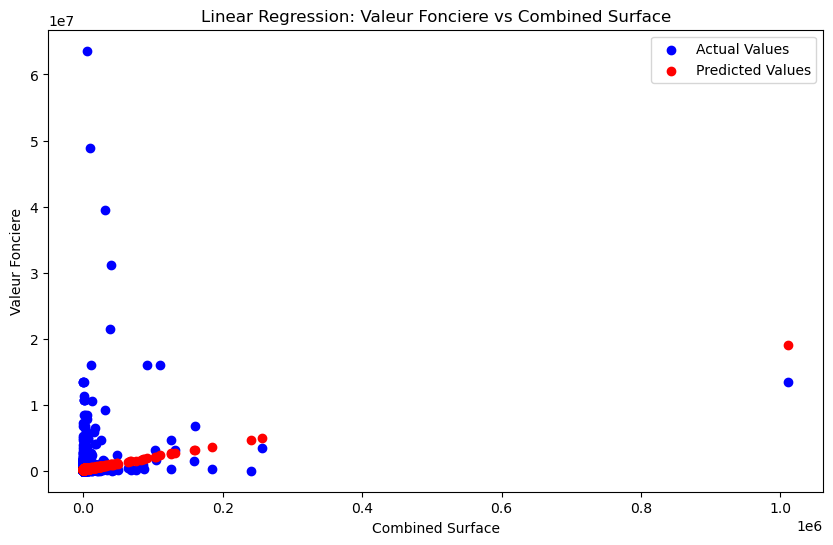

In [161]:
encoder = OneHotEncoder()
column_transformer = ColumnTransformer(
    [('encoder', encoder, ['Code departement'])], 
    remainder='passthrough'
)

# Create a pipeline with the column transformer and the linear regression model
model = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('regressor', LinearRegression())
])

# Define X and y
X = aggregated_data[['Surface_combined', 'Code departement']]
y = aggregated_data['Valeur fonciere']

# Fit the model
model.fit(X, y)

# Predict values
y_pred = model.predict(X)

# Calculate Mean Squared Error
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)
print("Model Coefficients:", model.named_steps['regressor'].coef_)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(aggregated_data['Surface_combined'], y, color='blue', label='Actual Values')
plt.scatter(aggregated_data['Surface_combined'], y_pred, color='red', label='Predicted Values')
plt.xlabel('Combined Surface')
plt.ylabel('Valeur Fonciere')
plt.title('Linear Regression: Valeur Fonciere vs Combined Surface')
plt.legend()
plt.show()

Unique values in 'Code departement': ['1' '2' '3' '4' '5' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16' '17'
 '19' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30' '31' '32' '33'
 '35' '36' '37' '38' '39' '40' '41' '42' '43' '44' '45' '46' '47' '48'
 '49' '50' '51' '52' '53' '54' '55' '56' '58' '59' '60' '61' '62' '63'
 '64' '65' '66' '69' '70' '71' '72' '73' '74' '76' '77' '78' '79' '80'
 '81' '85' '86' '87' '88' '89' '90' '91']
Mean Squared Error: 33950840984.845722
Model Coefficients: [79.73974764]


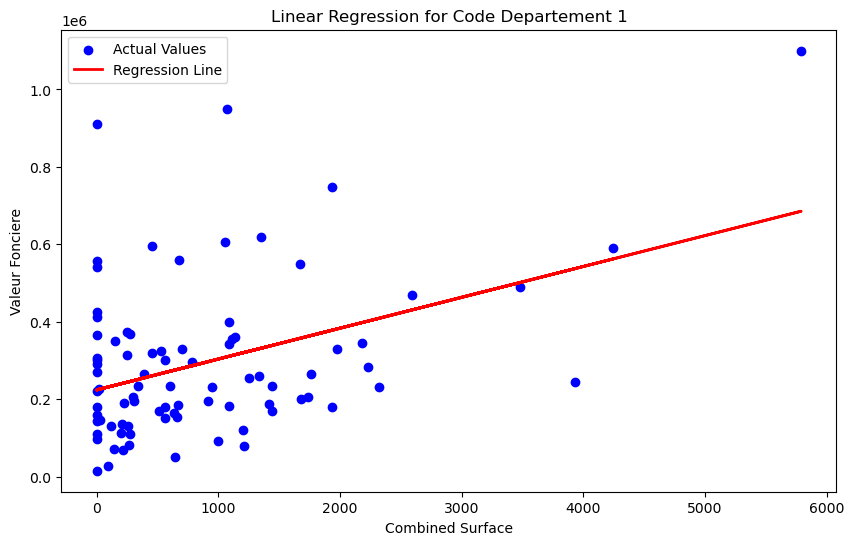

In [149]:
# Check unique values in 'Code departement' column
print("Unique values in 'Code departement':", aggregated_data['Code departement'].unique())

# Specify the Code departement you are interested in
specific_code_departement = '1'

# Verify that the specified Code departement exists
if specific_code_departement not in aggregated_data['Code departement'].unique():
    print(f"No data found for Code departement: {specific_code_departement}")
else:
    # Filter the data for the specific Code departement
    filtered_data = aggregated_data[aggregated_data['Code departement'] == specific_code_departement]

    # Define X and y for the filtered data
    X = filtered_data[['Surface_combined']]
    y = filtered_data['Valeur fonciere']

    # Create and fit the model
    model = LinearRegression()
    model.fit(X, y)

    # Predict values
    y_pred = model.predict(X)

    # Calculate Mean Squared Error
    mse = mean_squared_error(y, y_pred)
    print("Mean Squared Error:", mse)
    print("Model Coefficients:", model.coef_)

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Actual Values')
    plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
    plt.xlabel('Combined Surface')
    plt.ylabel('Valeur Fonciere')
    plt.title(f'Linear Regression for Code Departement {specific_code_departement}')
    plt.legend()
    plt.show()


Unique values in 'Code departement': ['1' '2' '3' '4' '5' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16' '17'
 '19' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30' '31' '32' '33'
 '35' '36' '37' '38' '39' '40' '41' '42' '43' '44' '45' '46' '47' '48'
 '49' '50' '51' '52' '53' '54' '55' '56' '58' '59' '60' '61' '62' '63'
 '64' '65' '66' '69' '70' '71' '72' '73' '74' '76' '77' '78' '79' '80'
 '81' '85' '86' '87' '88' '89' '90' '91']
Code Departement: 1
Mean Squared Error: 33950840984.845722
Model Coefficients: [79.73974764]


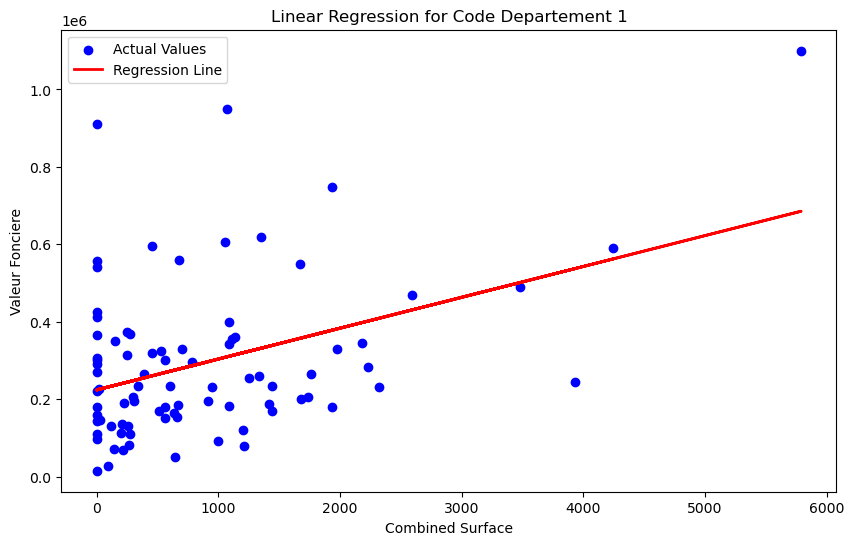

Code Departement: 2
Mean Squared Error: 1654914177.99479
Model Coefficients: [50.85168363]


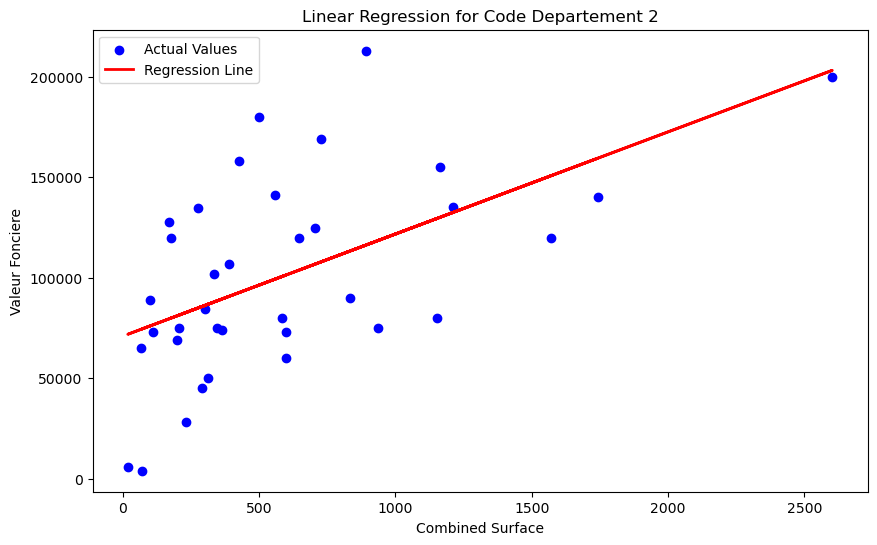

Code Departement: 3
Mean Squared Error: 2.117582368135751e-21
Model Coefficients: [82.82269223]


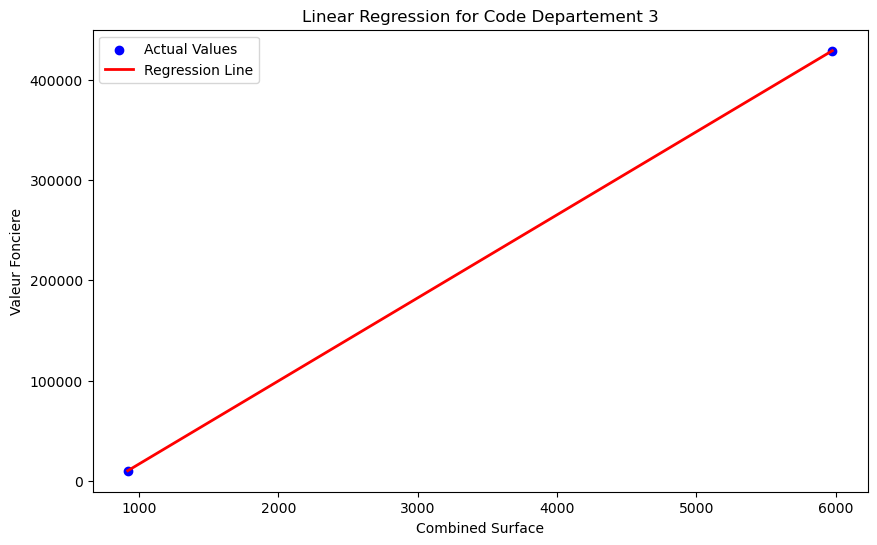

Code Departement: 4
Mean Squared Error: 33486335262.59859
Model Coefficients: [-2.21604838]


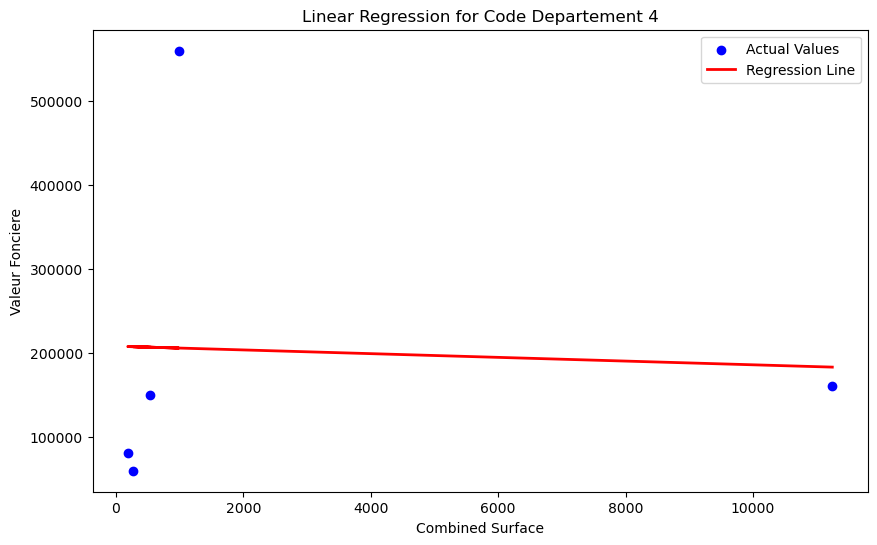

Code Departement: 5
Mean Squared Error: 16636014626.588871
Model Coefficients: [112.61605877]


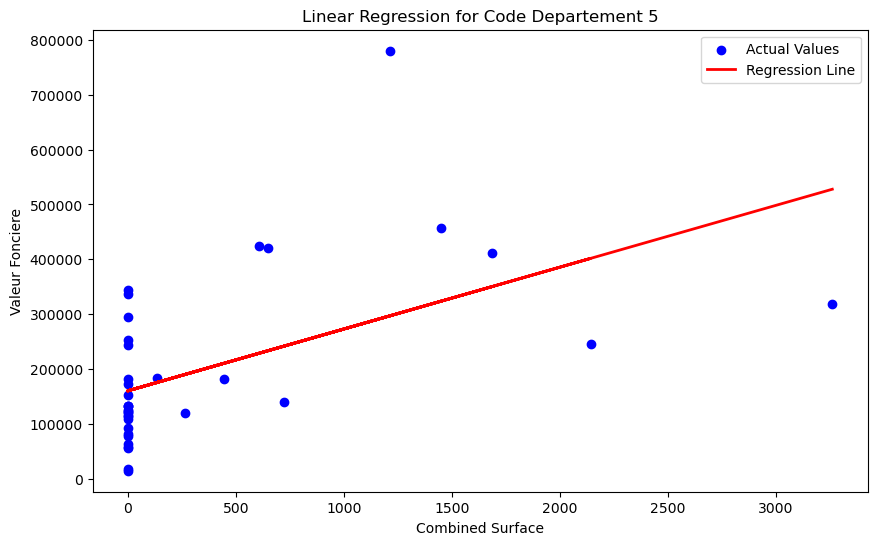

Code Departement: 7
Mean Squared Error: 11193343733.060507
Model Coefficients: [-0.64029694]


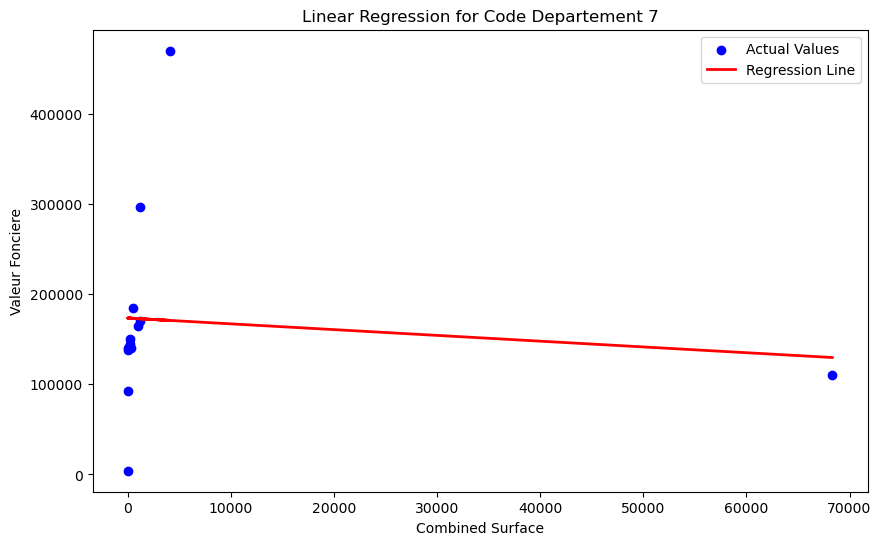

Code Departement: 8
Mean Squared Error: 31315998126.77883
Model Coefficients: [1.6785709]


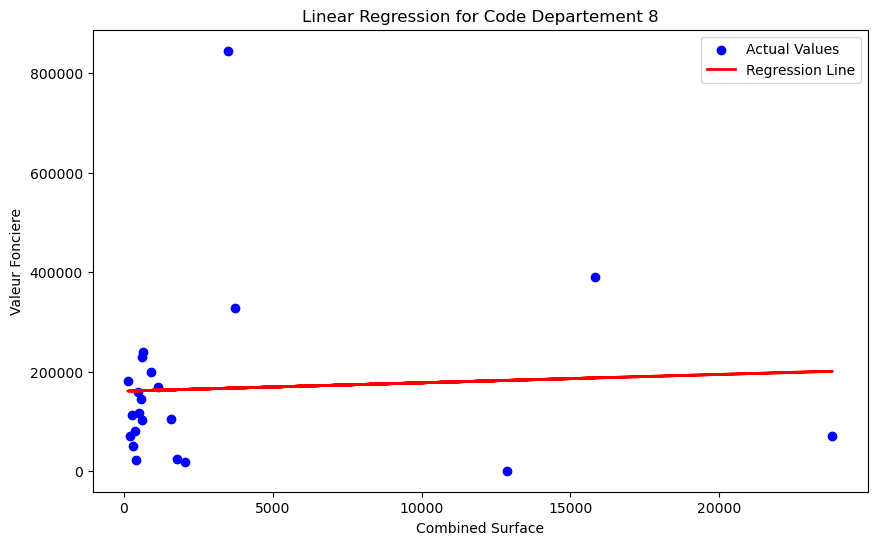

Code Departement: 9
Mean Squared Error: 1.0587911840678754e-22
Model Coefficients: [719.29824561]


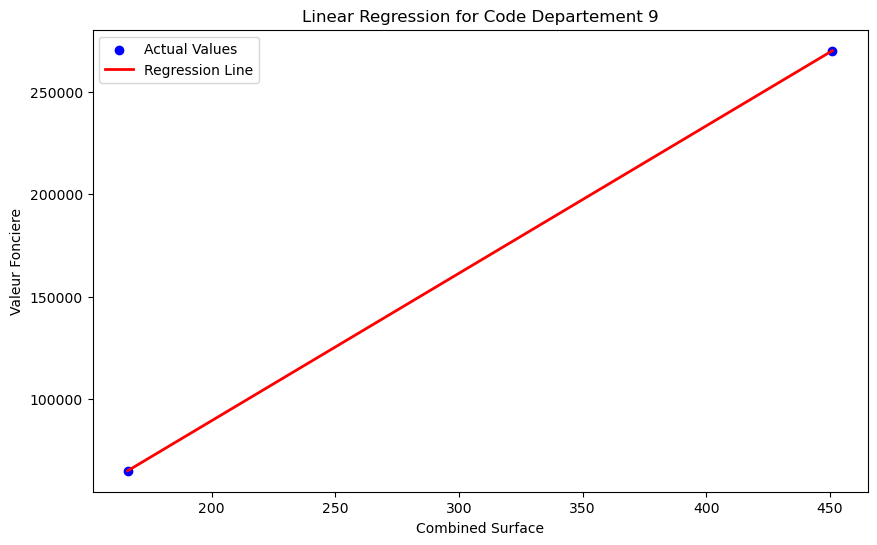

Code Departement: 10
Mean Squared Error: 2637074206.9456944
Model Coefficients: [2.50294775]


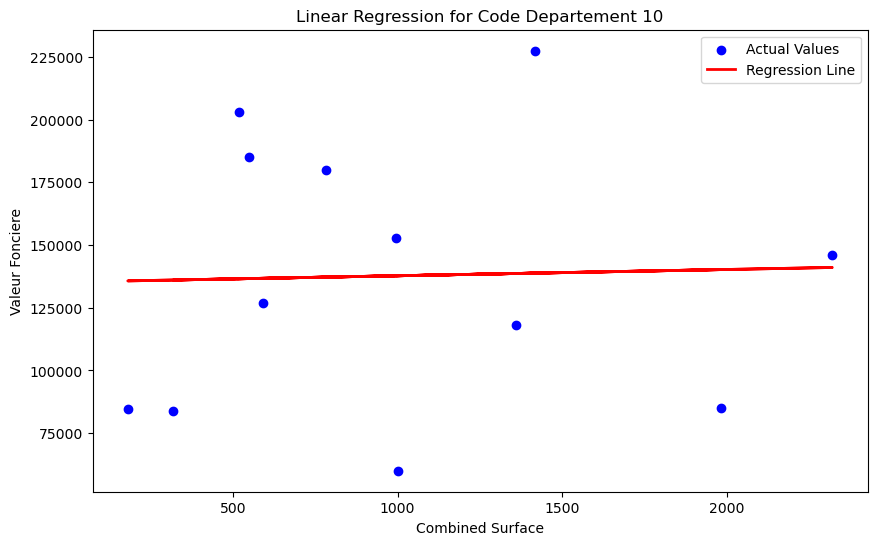

Code Departement: 11
Mean Squared Error: 650343210.6467043
Model Coefficients: [143.3046733]


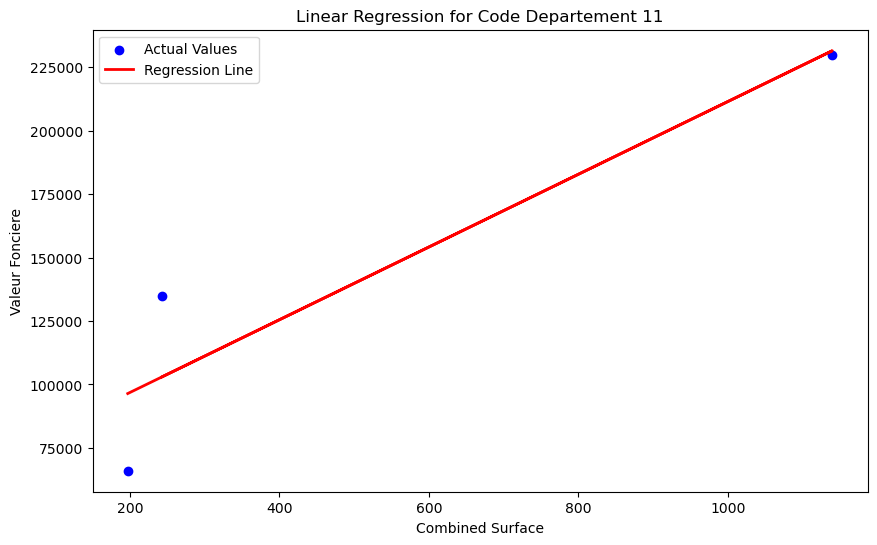

Code Departement: 12
Mean Squared Error: 61970359454.368774
Model Coefficients: [35.24744508]


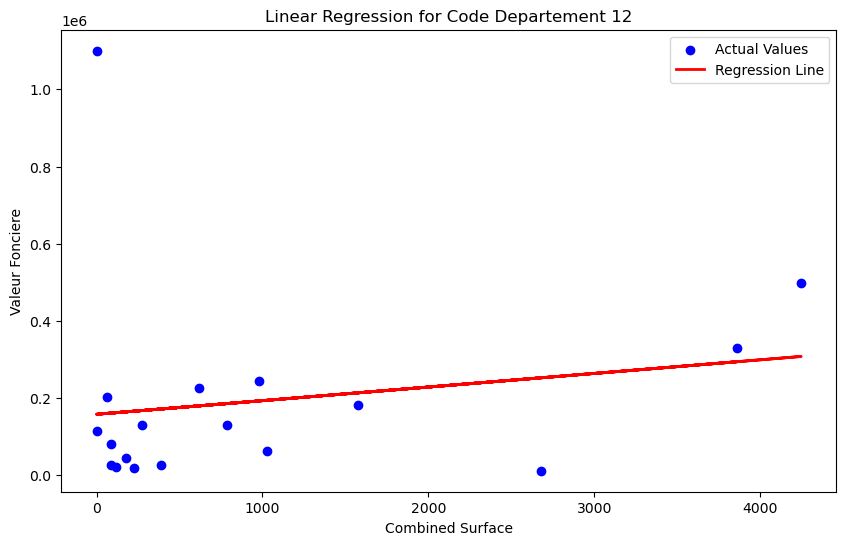

Code Departement: 13
Mean Squared Error: 1541064031526.7646
Model Coefficients: [132.32390173]


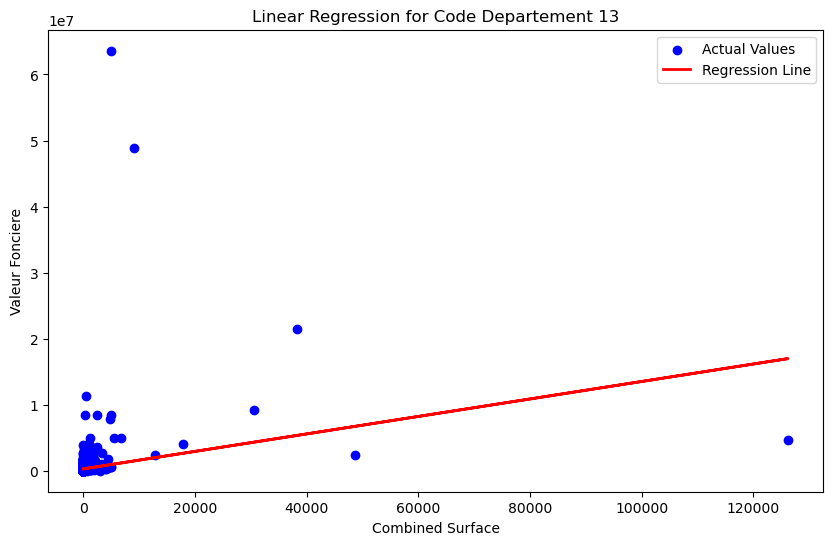

Code Departement: 14
Mean Squared Error: 49603507186.236
Model Coefficients: [6.23407301]


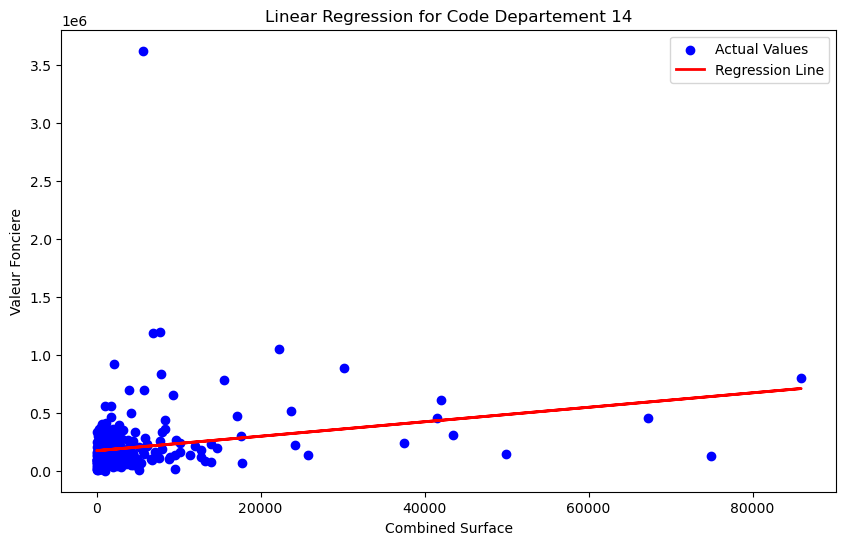

Code Departement: 15
Mean Squared Error: 5522631049.298581
Model Coefficients: [11.42210696]


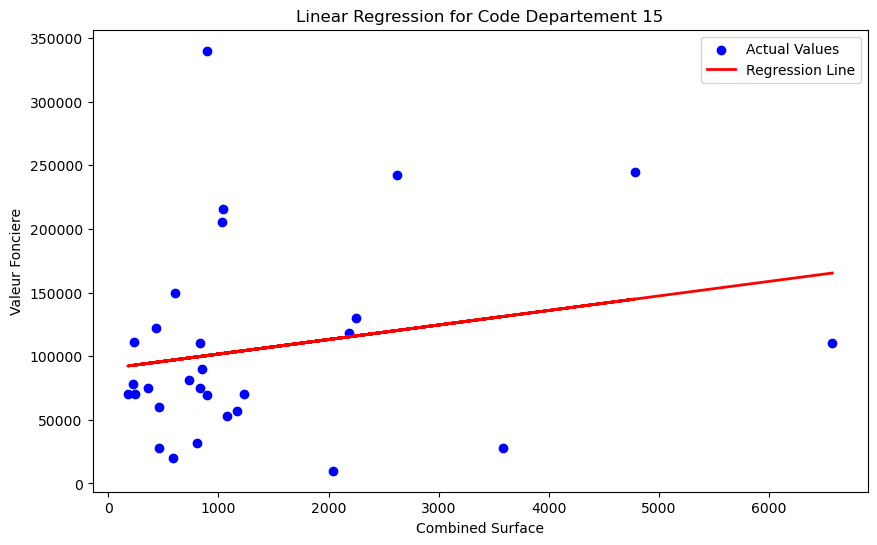

Code Departement: 16
Mean Squared Error: 9671593114.33694
Model Coefficients: [8.05083068]


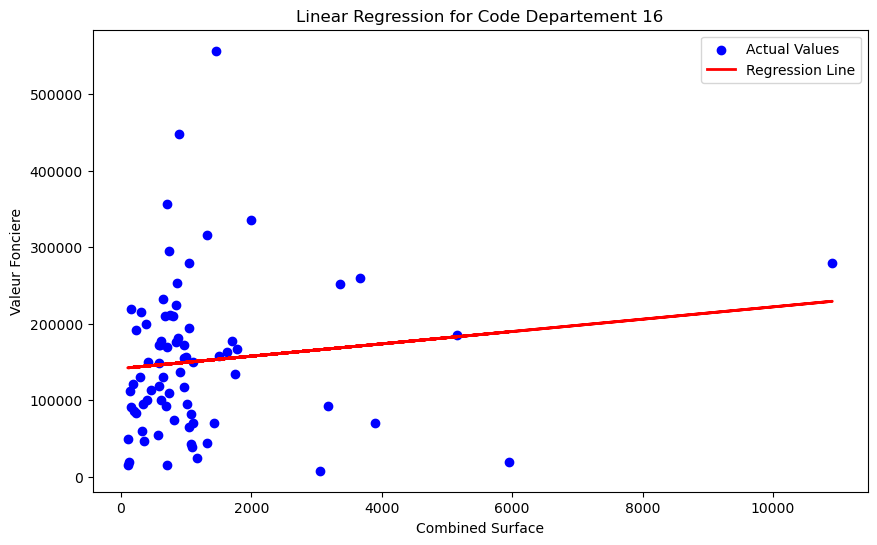

Code Departement: 17
Mean Squared Error: 9840352997.180916
Model Coefficients: [44.08362733]


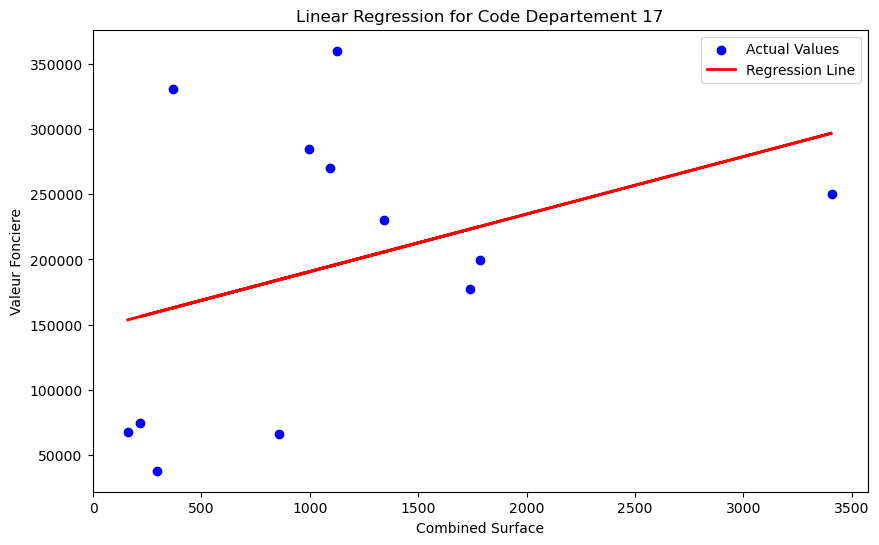

Code Departement: 19
Mean Squared Error: 8106421783.607772
Model Coefficients: [-19.2915482]


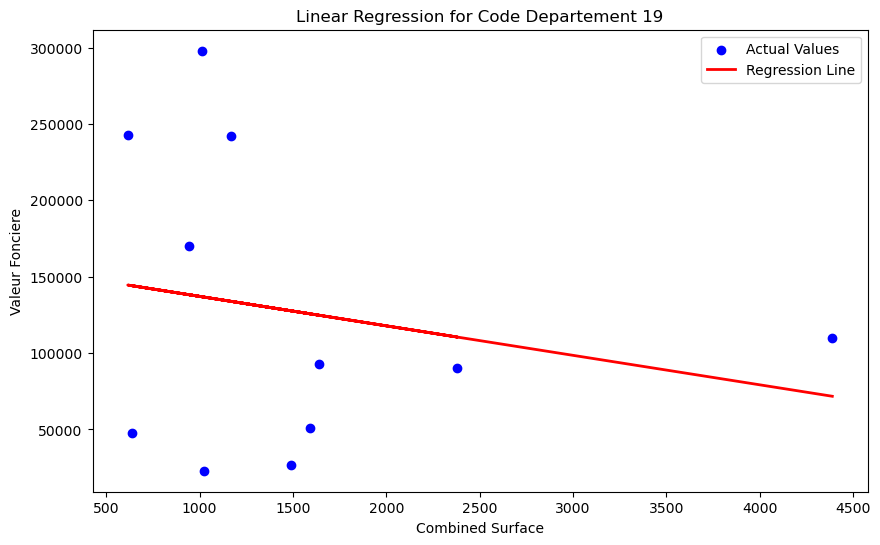

Code Departement: 21
Mean Squared Error: 5073701307.7034445
Model Coefficients: [78.89094049]


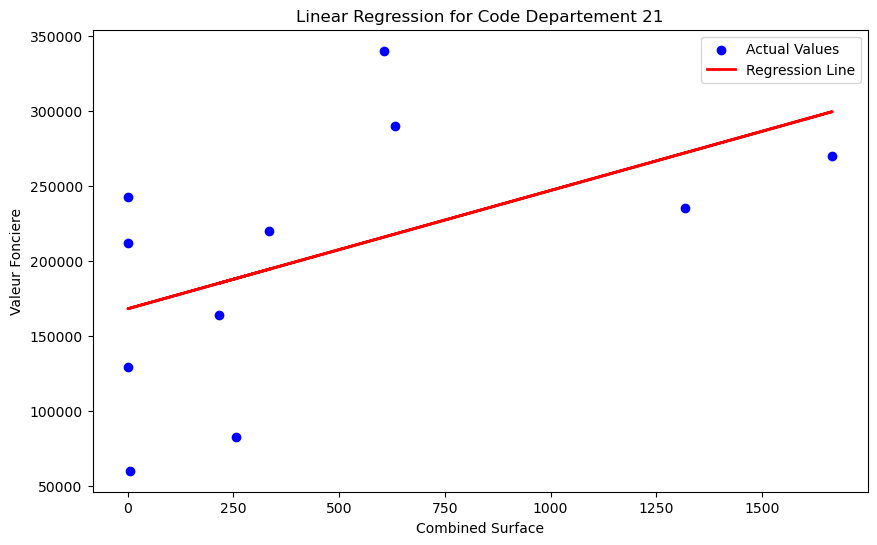

Code Departement: 22
Mean Squared Error: 26292977365.146297
Model Coefficients: [30.65776191]


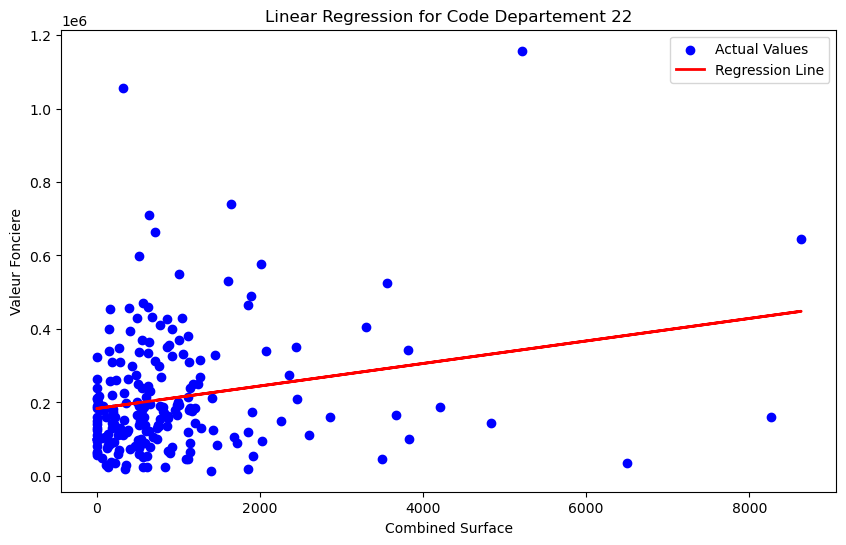

Code Departement: 23
Mean Squared Error: 2413735283.380926
Model Coefficients: [11.63256792]


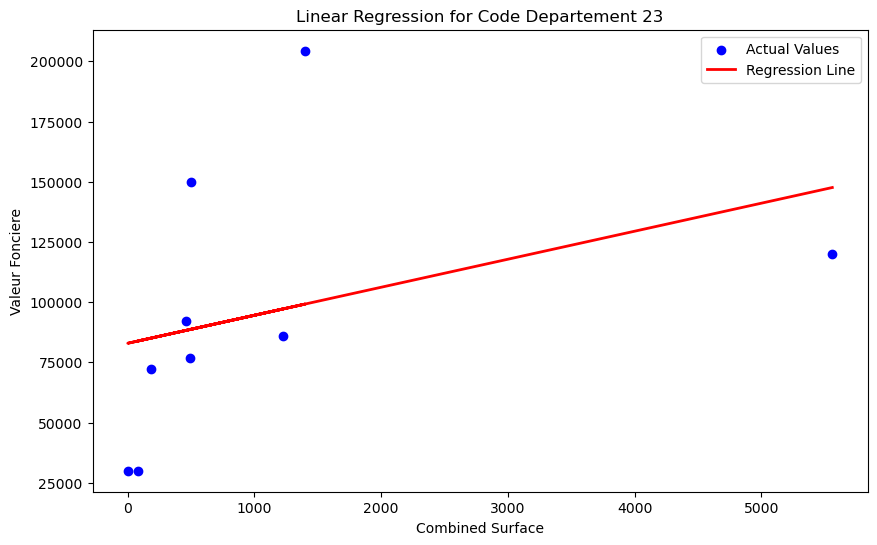

Code Departement: 24
Mean Squared Error: 60852634492.91719
Model Coefficients: [17.30861382]


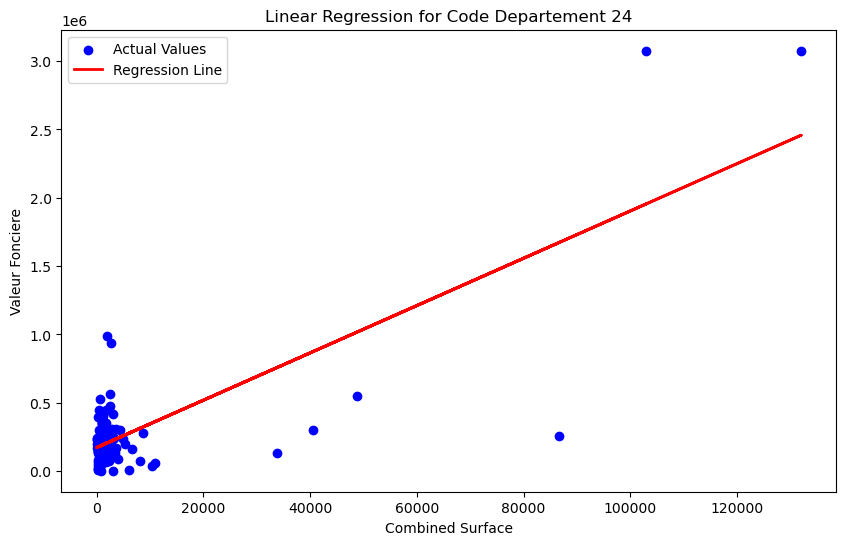

Code Departement: 25
Mean Squared Error: 6376020056.740707
Model Coefficients: [0.19230789]


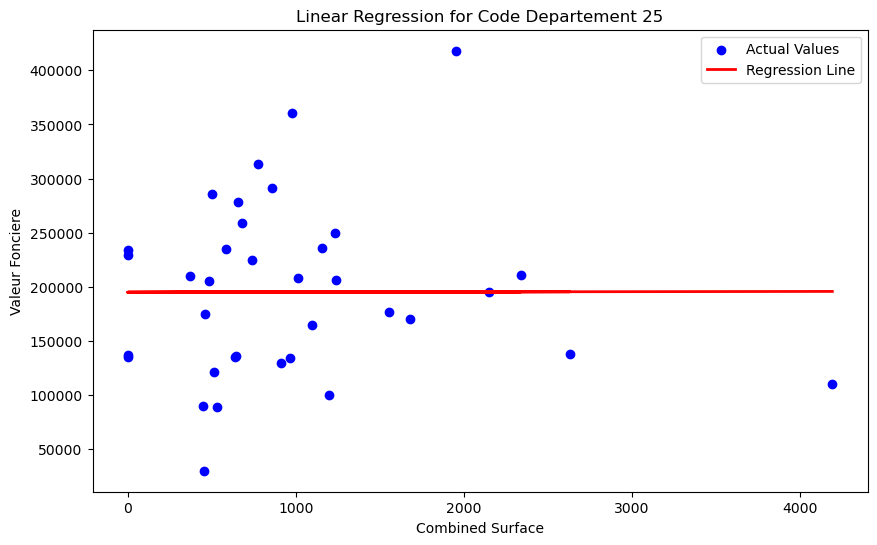

Code Departement: 26
Mean Squared Error: 10353750644.25984
Model Coefficients: [-12.91389256]


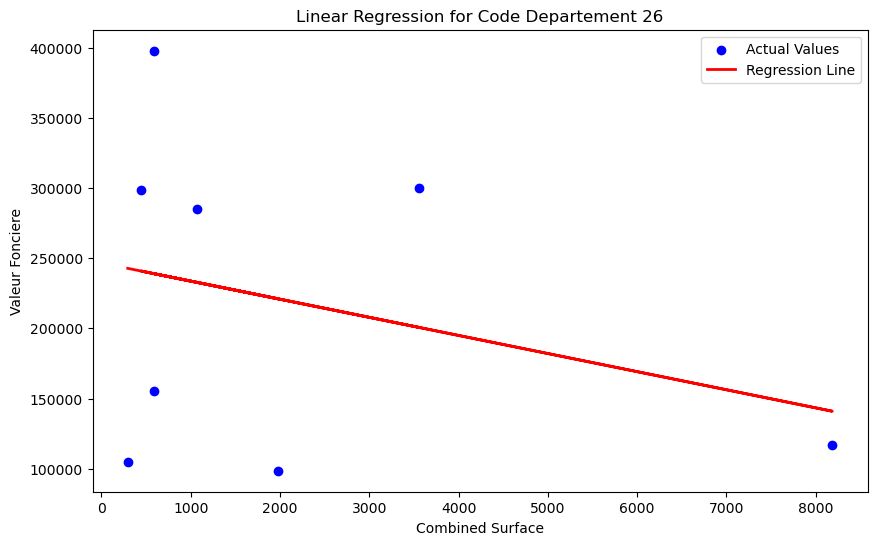

Code Departement: 27
Mean Squared Error: 25545307941.55386
Model Coefficients: [10.06243401]


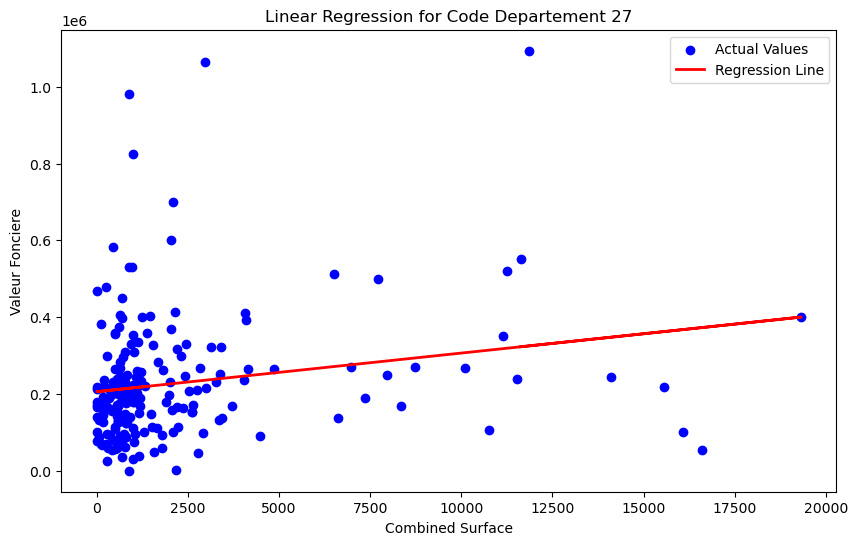

Code Departement: 28
Mean Squared Error: 10865375432.159248
Model Coefficients: [14.6728988]


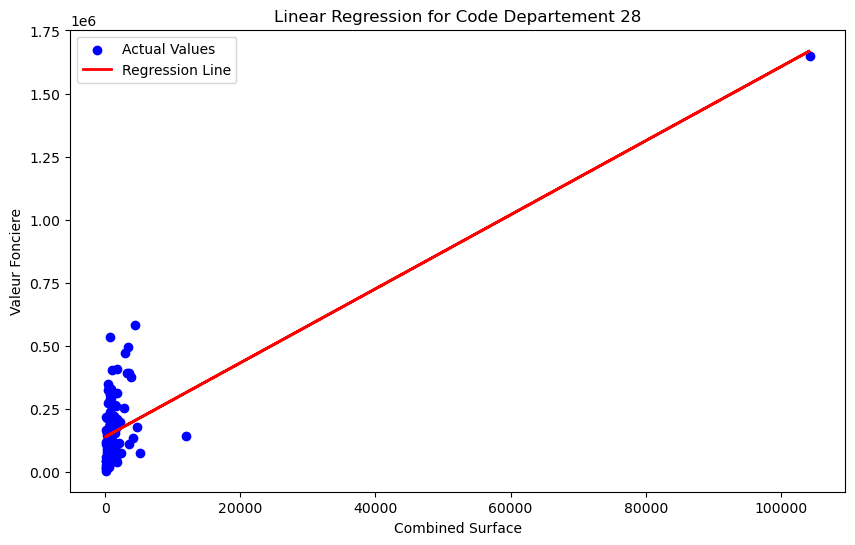

Code Departement: 29
Mean Squared Error: 8654733983.89716
Model Coefficients: [26.81008645]


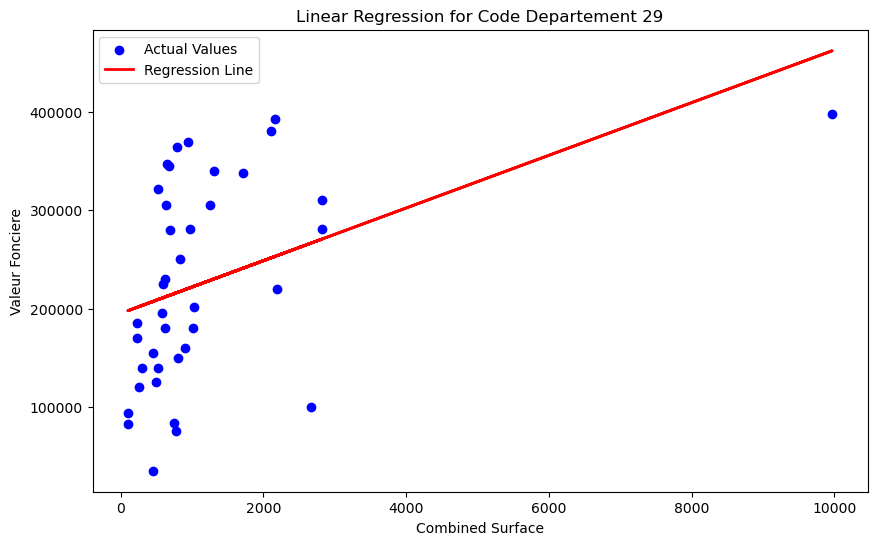

Code Departement: 30
Mean Squared Error: 2838310833.911067
Model Coefficients: [118.76015219]


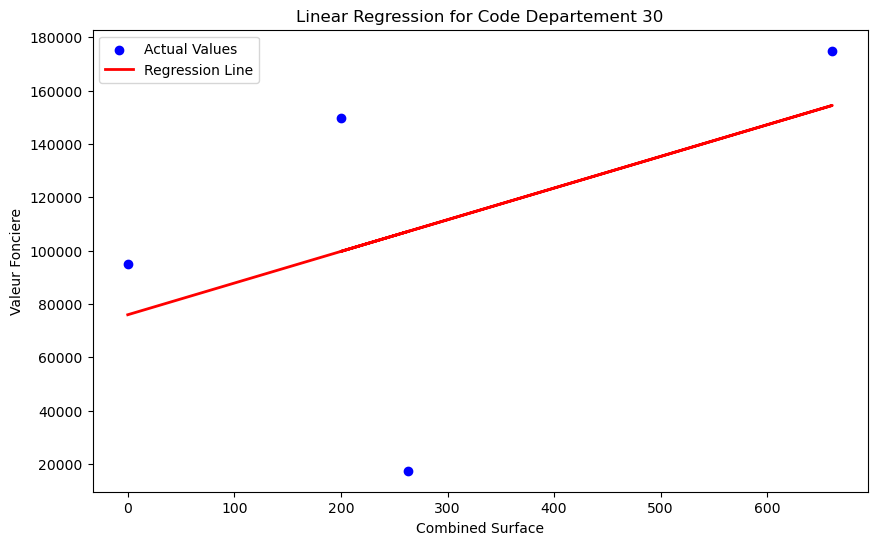

Code Departement: 31
Mean Squared Error: 664107716055.5492
Model Coefficients: [14.46676166]


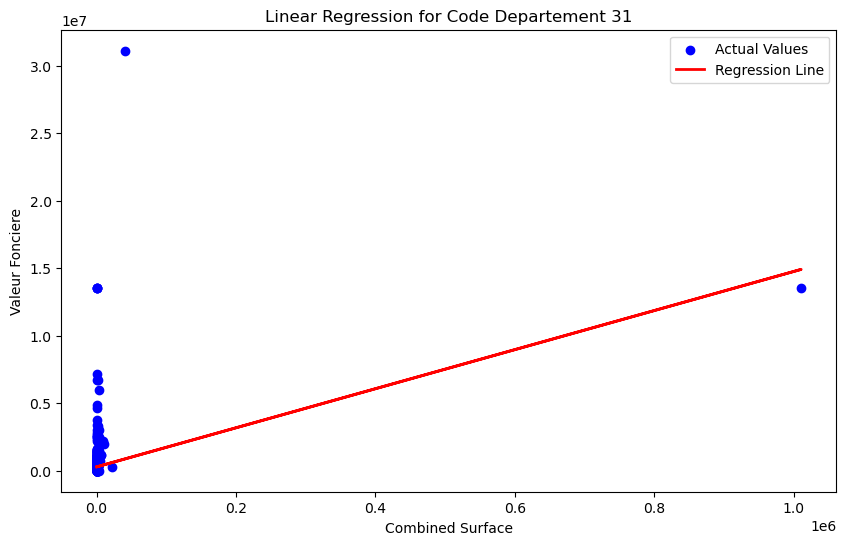

Code Departement: 32
Mean Squared Error: 4217842384.946553
Model Coefficients: [58.93193347]


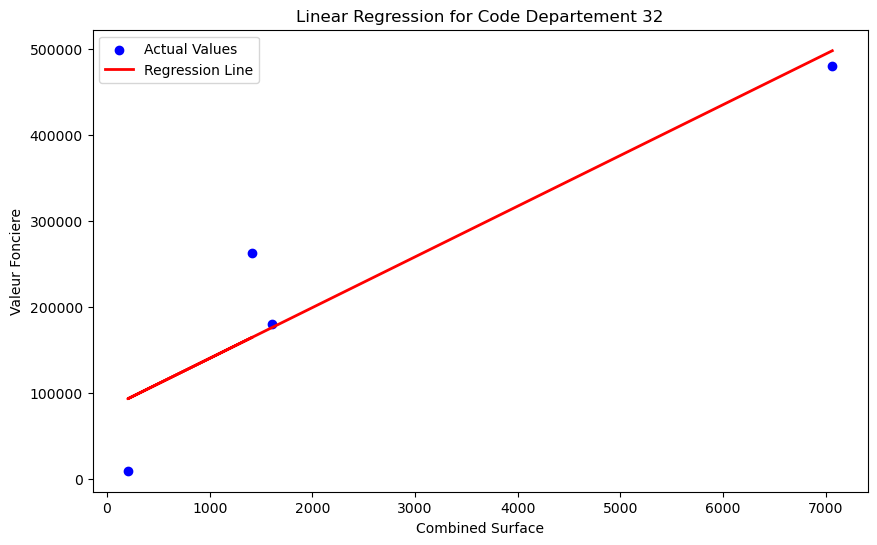

Code Departement: 33
Mean Squared Error: 21851838119.213814
Model Coefficients: [-1.00523186]


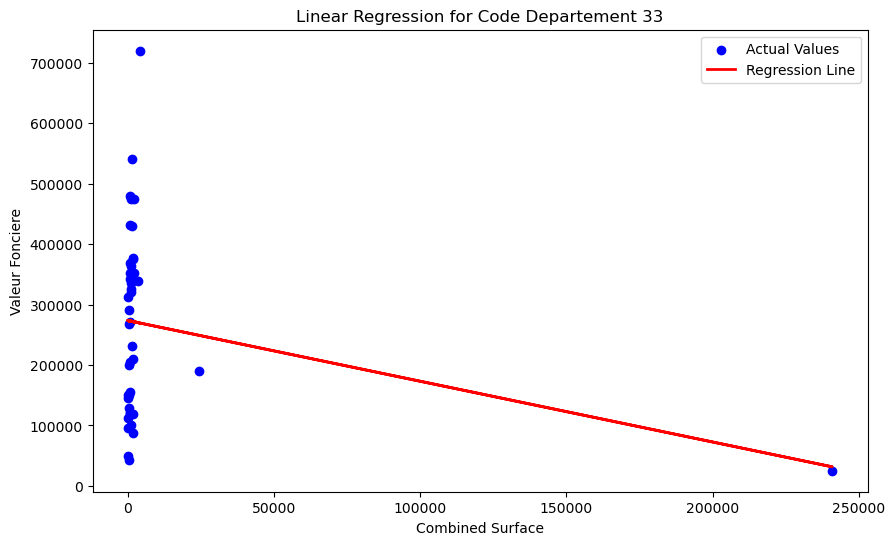

Code Departement: 35
Mean Squared Error: 9166275274.790754
Model Coefficients: [19.47293288]


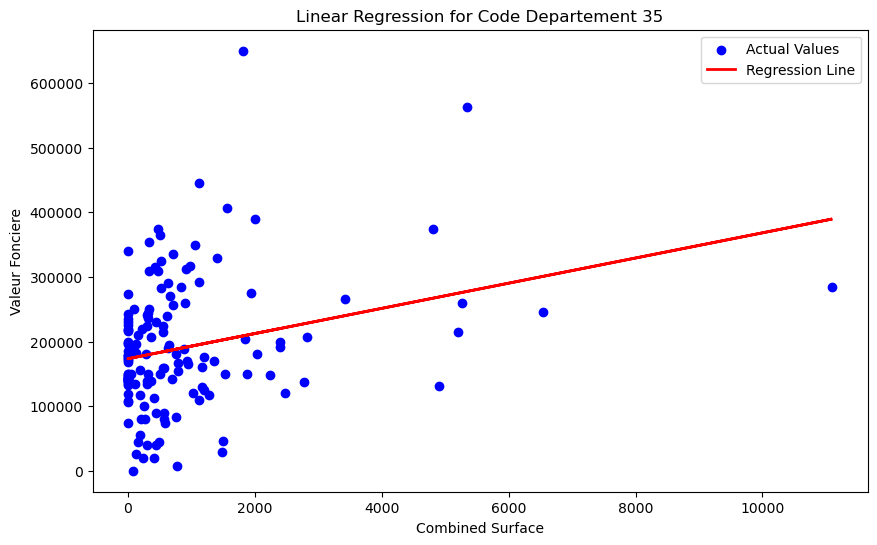

Code Departement: 36
Mean Squared Error: 8954412289.4861
Model Coefficients: [-103.98368071]


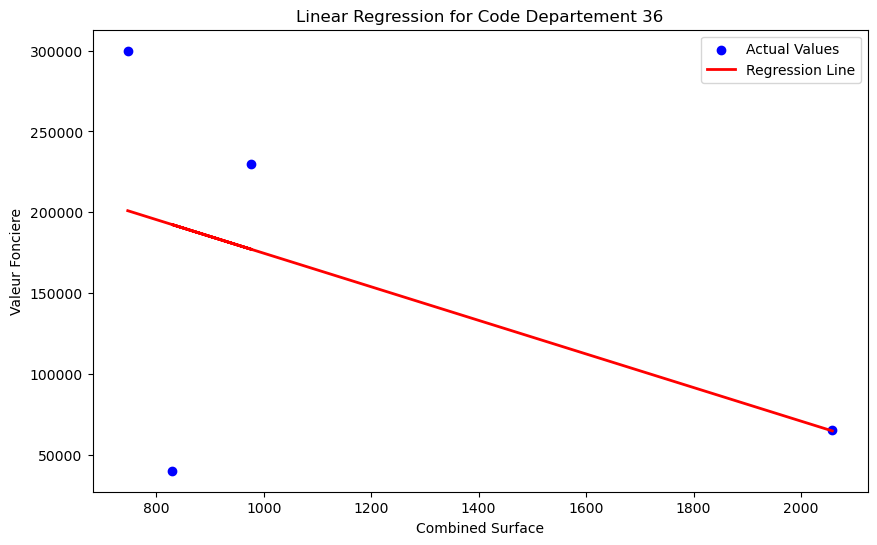

Code Departement: 37
Mean Squared Error: 19312006967.265316
Model Coefficients: [96.3525294]


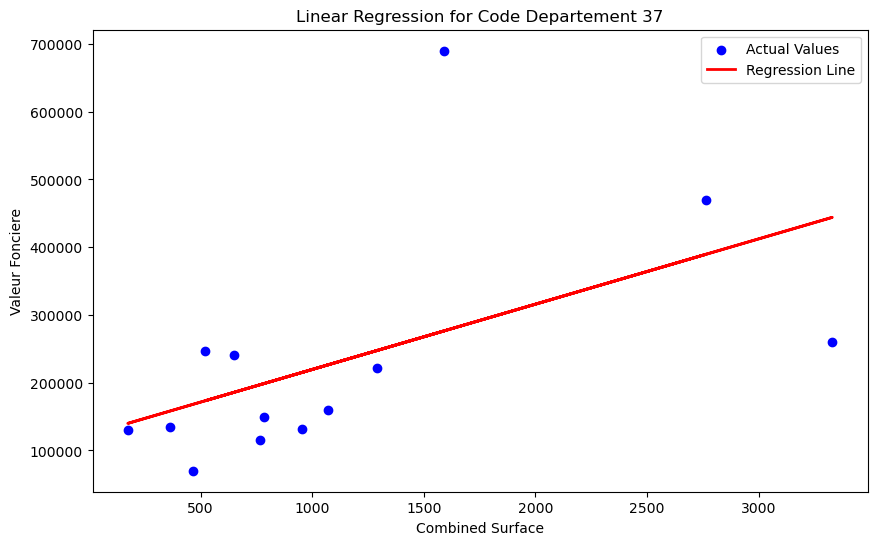

Code Departement: 38
Mean Squared Error: 46280472657.29594
Model Coefficients: [119.80093763]


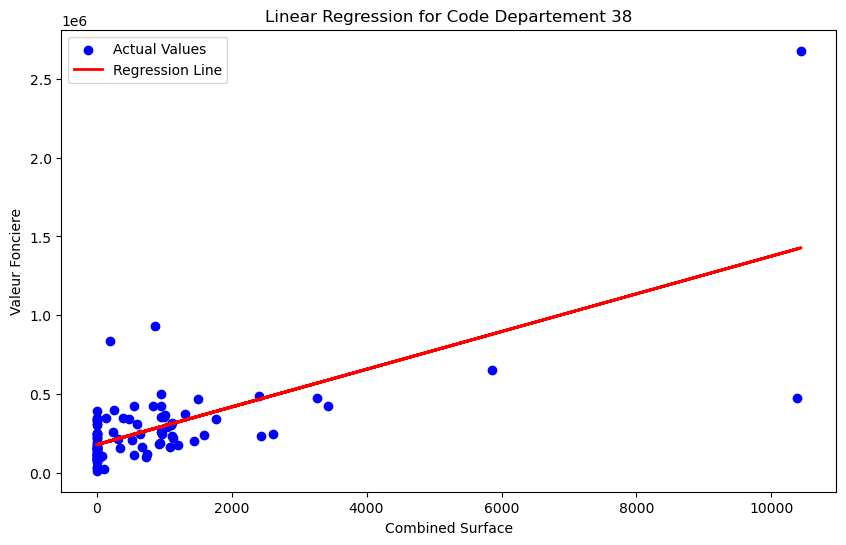

Code Departement: 39
Mean Squared Error: 11332845285.078121
Model Coefficients: [53.17416185]


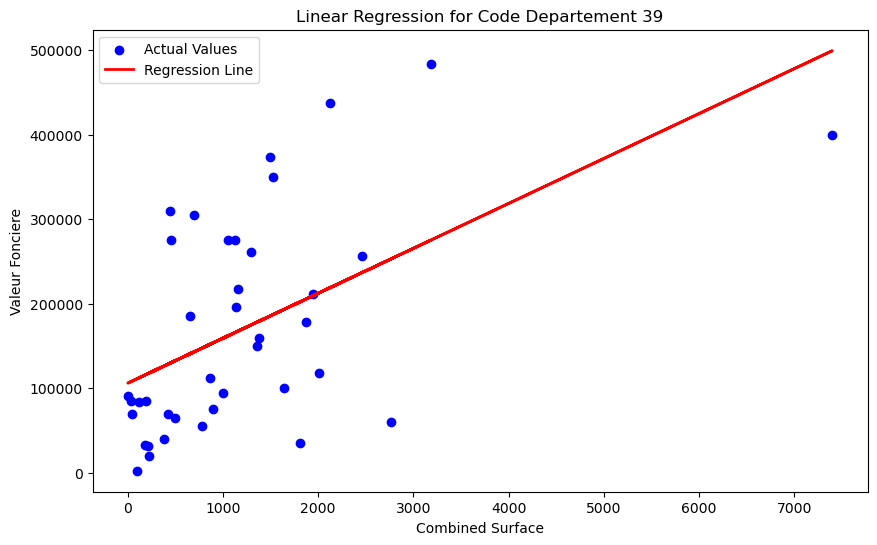

Code Departement: 40
Mean Squared Error: 3367972277.9728594
Model Coefficients: [92.60845145]


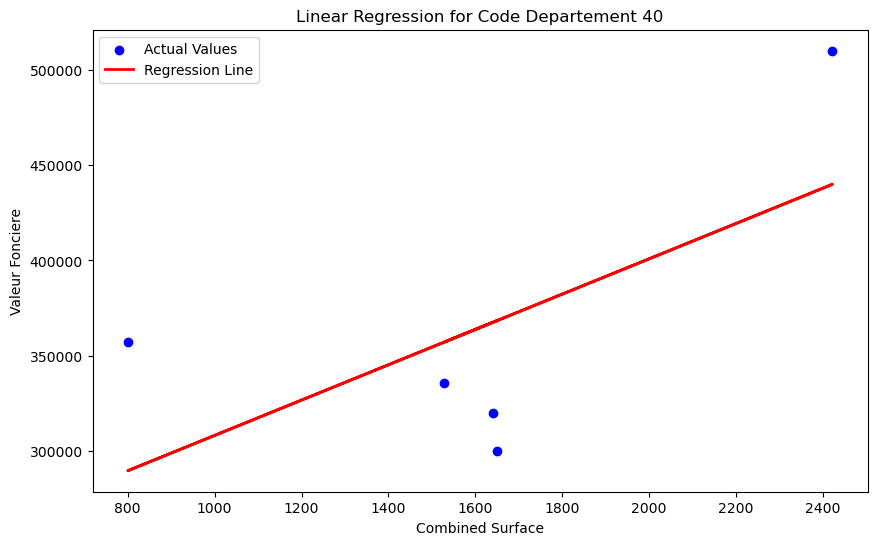

Code Departement: 41
Mean Squared Error: 7108655370.410862
Model Coefficients: [46.03224846]


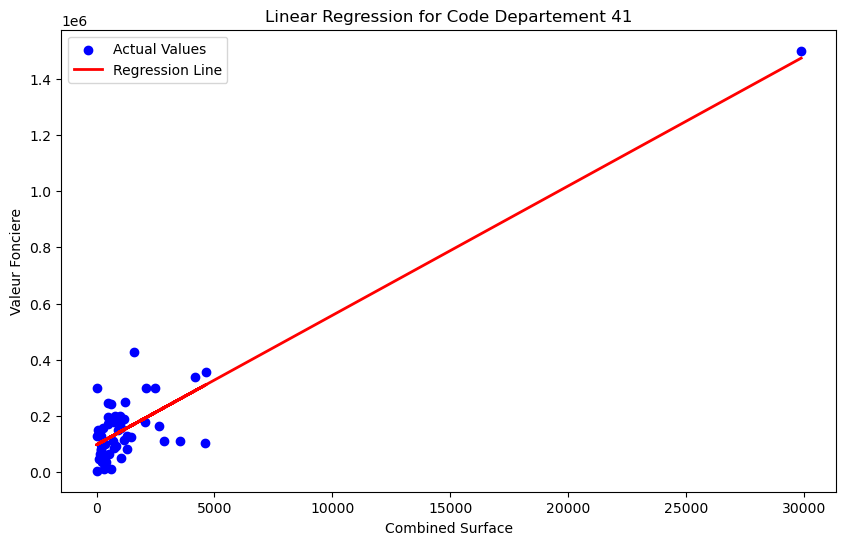

Code Departement: 42
Mean Squared Error: 50768122537.665924
Model Coefficients: [65.59278276]


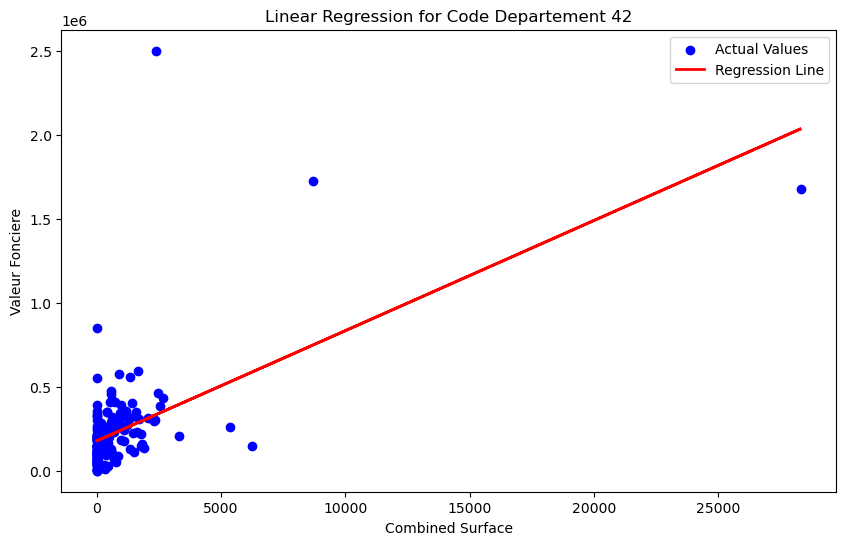

Code Departement: 43
Mean Squared Error: 3501003113.479979
Model Coefficients: [206.87402433]


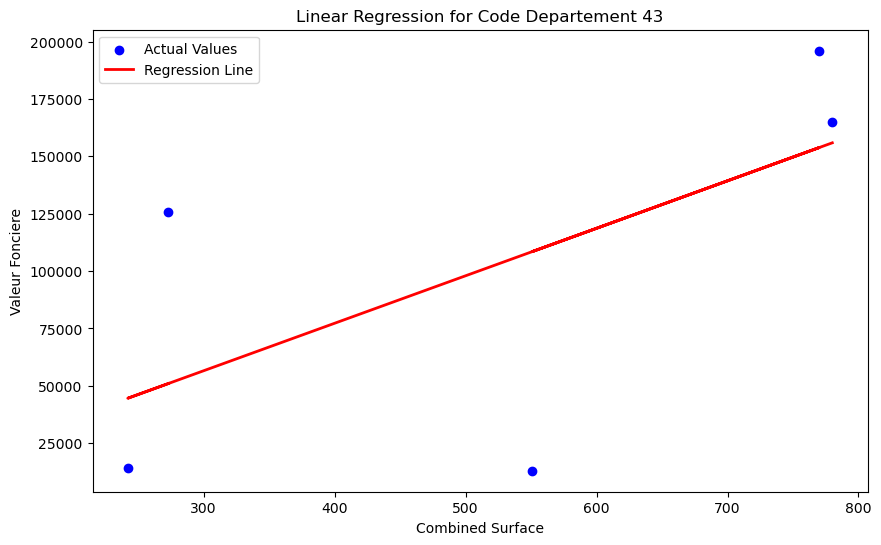

Code Departement: 44
Mean Squared Error: 161589927110.3796
Model Coefficients: [53.58909026]


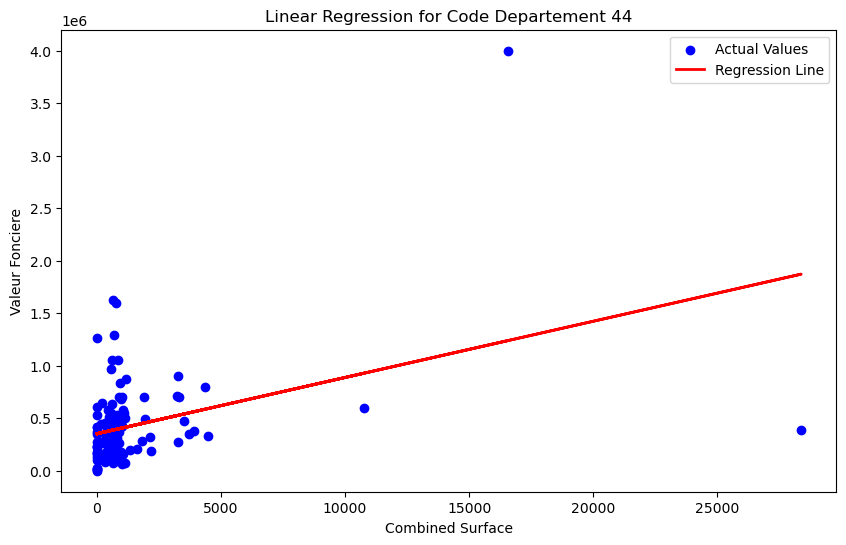

Code Departement: 45
Mean Squared Error: 7283638047.567457
Model Coefficients: [74.8174223]


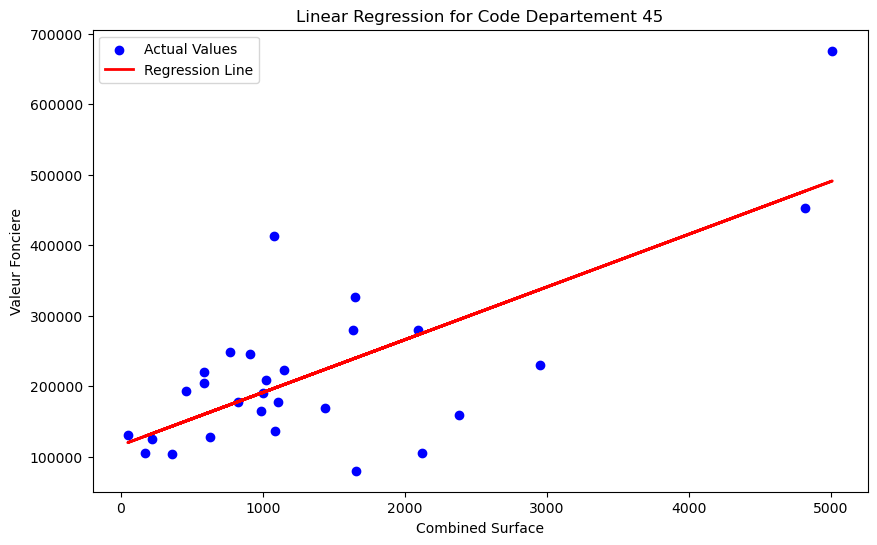

Code Departement: 46
Mean Squared Error: 34525324223.369255
Model Coefficients: [30.49070043]


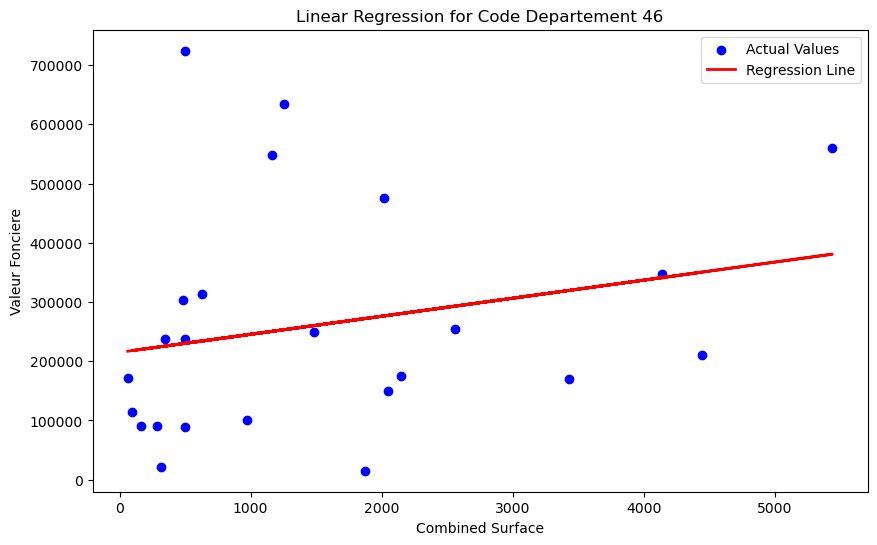

Code Departement: 47
Mean Squared Error: 25335774655.352173
Model Coefficients: [-14.428409]


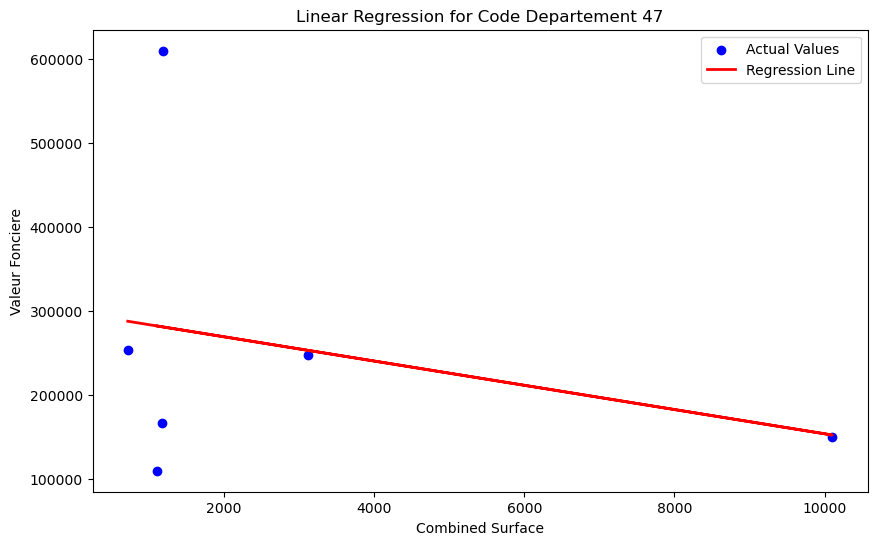

Code Departement: 48
Mean Squared Error: 12842385554.44009
Model Coefficients: [75.65420609]


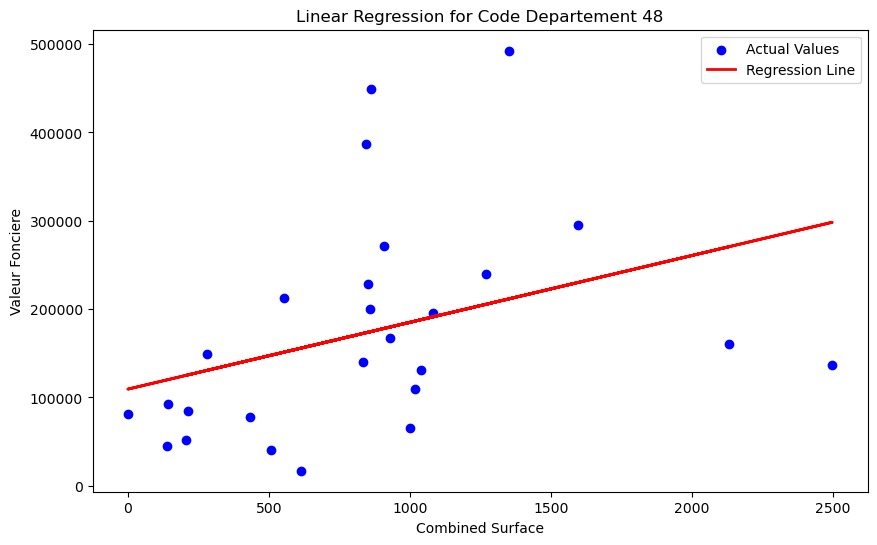

Code Departement: 49
Mean Squared Error: 132968930847.41698
Model Coefficients: [8.14724731]


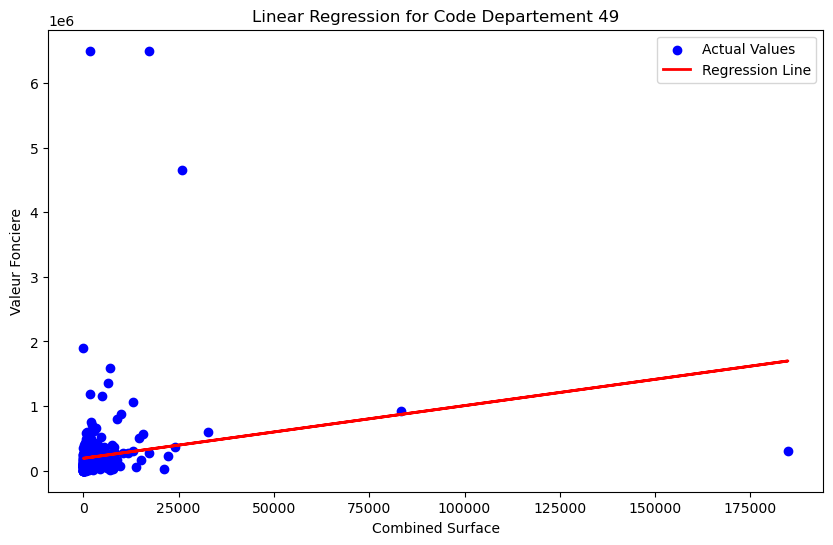

Code Departement: 50
Mean Squared Error: 2537996759728.4424
Model Coefficients: [121.51284666]


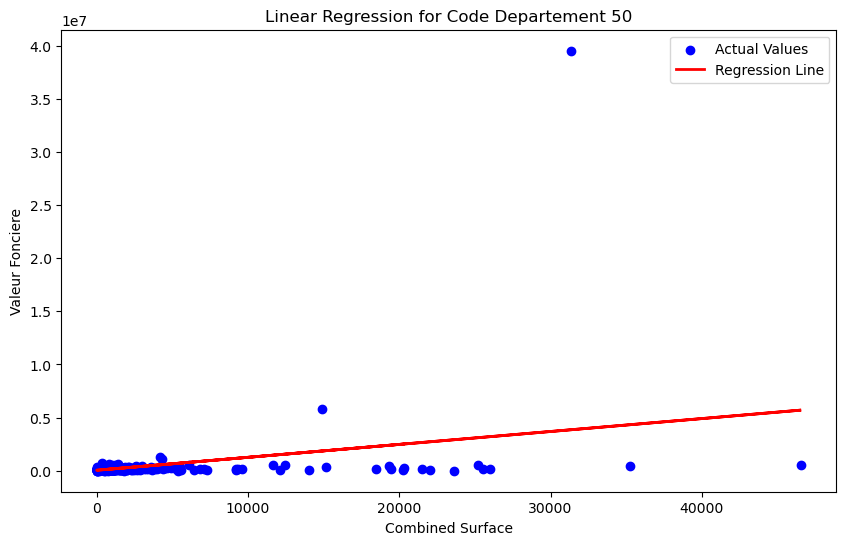

Code Departement: 51
Mean Squared Error: 60337562401.32388
Model Coefficients: [18.21317621]


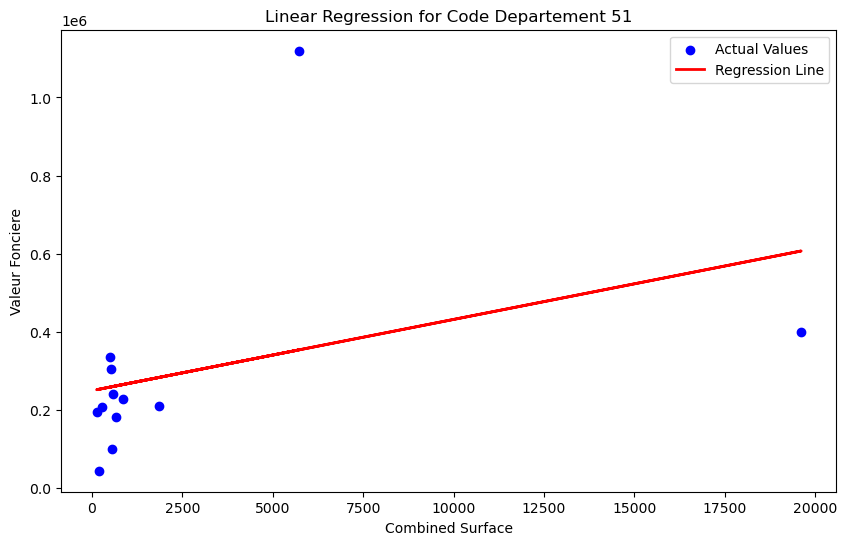

Code Departement: 52
Mean Squared Error: 14642641812.551231
Model Coefficients: [16.36268507]


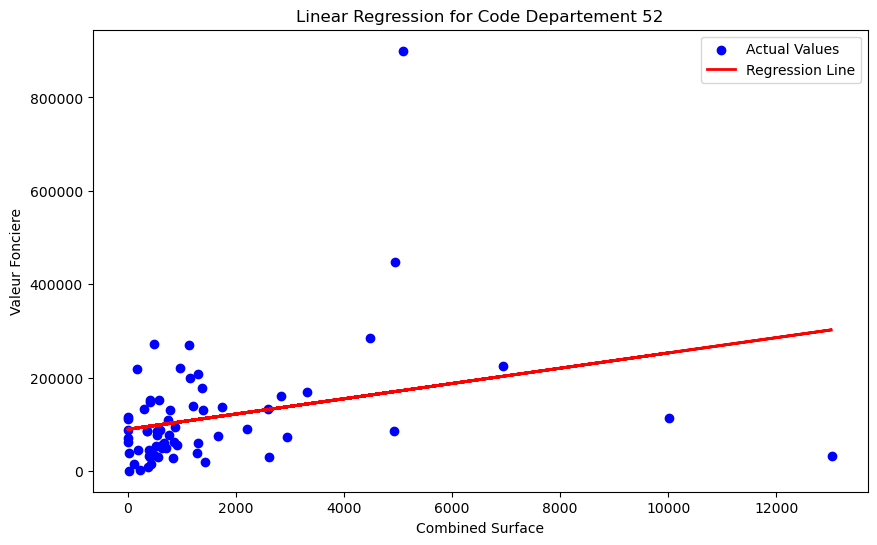

Code Departement: 53
Mean Squared Error: 5562482830.180786
Model Coefficients: [0.61387359]


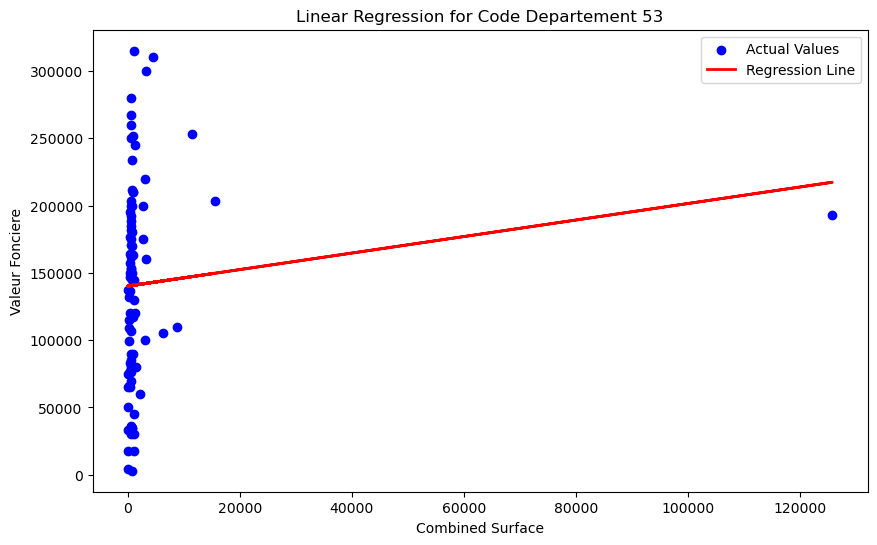

Code Departement: 54
Mean Squared Error: 3673059420.4623623
Model Coefficients: [204.66171898]


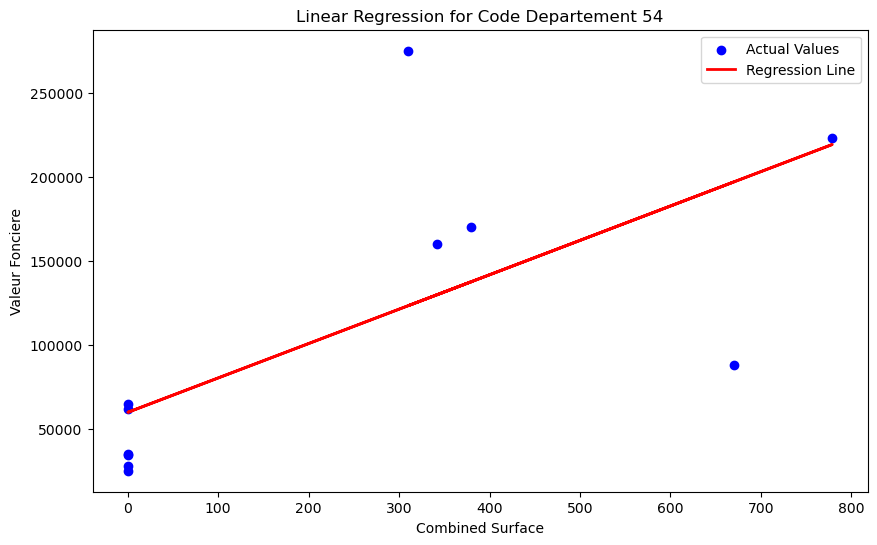

Code Departement: 55
Mean Squared Error: 3695759777.1306686
Model Coefficients: [157.3905911]


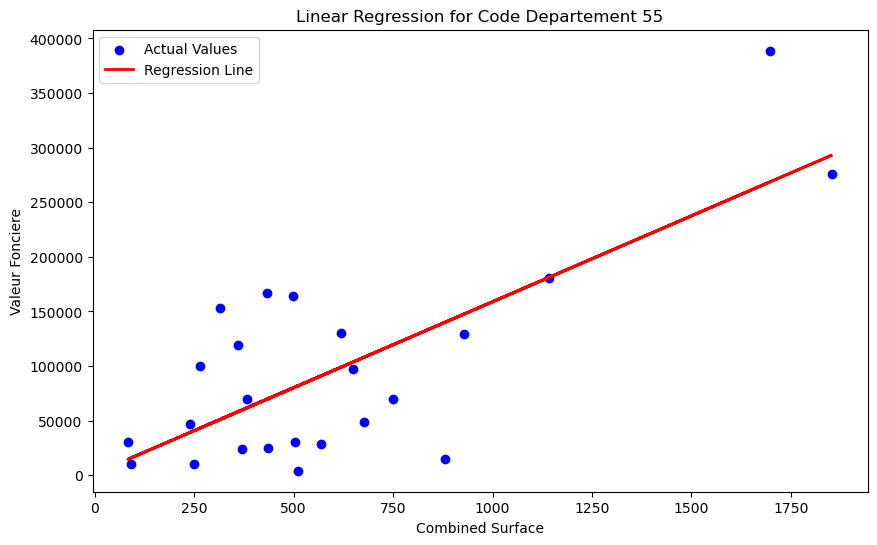

Code Departement: 56
Mean Squared Error: 7323348238.073283
Model Coefficients: [-1.51587537]


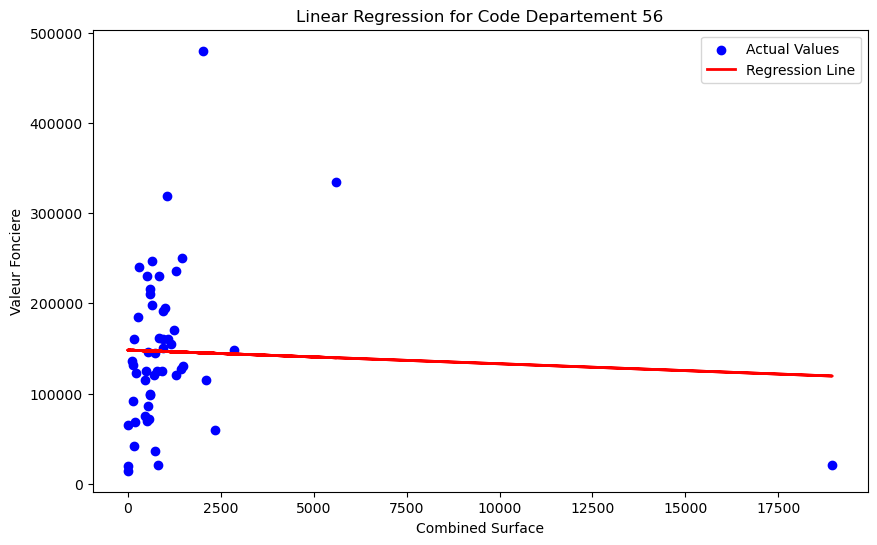

Code Departement: 58
Mean Squared Error: 30370462518.046505
Model Coefficients: [-46.46102197]


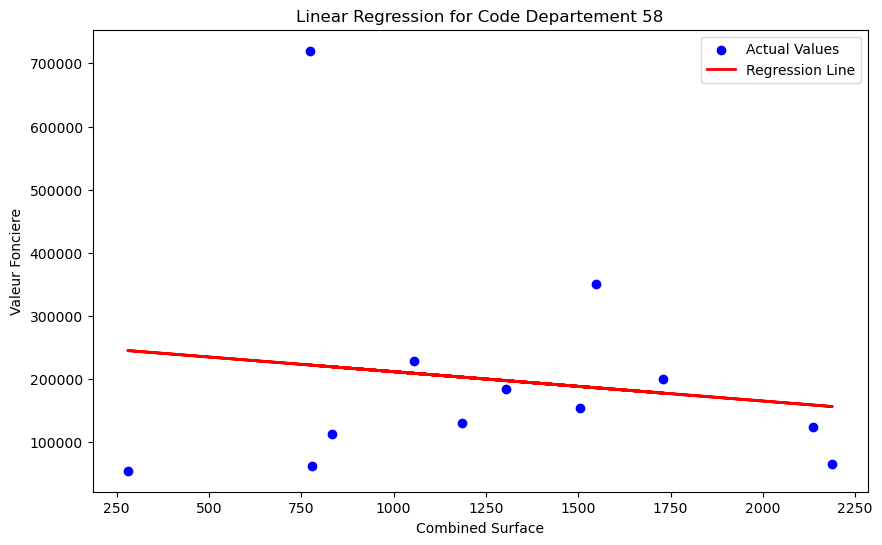

Code Departement: 59
Mean Squared Error: 22818323341.11176
Model Coefficients: [13.07061462]


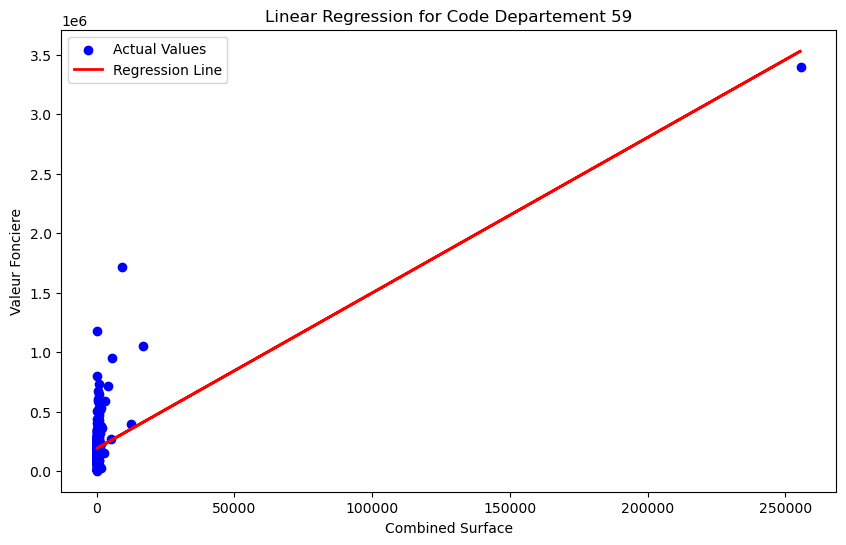

Code Departement: 60
Mean Squared Error: 21498498854.541576
Model Coefficients: [9.42035988]


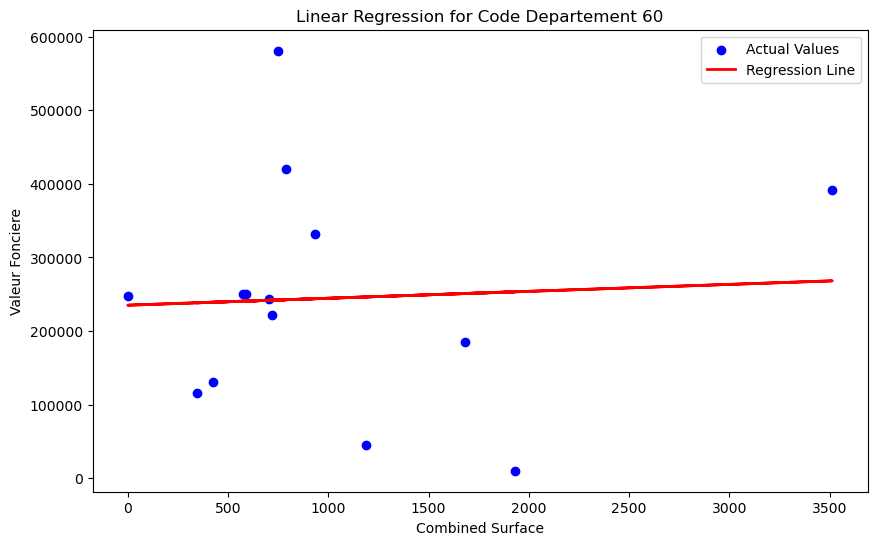

Code Departement: 61
Mean Squared Error: 3163271370932.8267
Model Coefficients: [139.97023782]


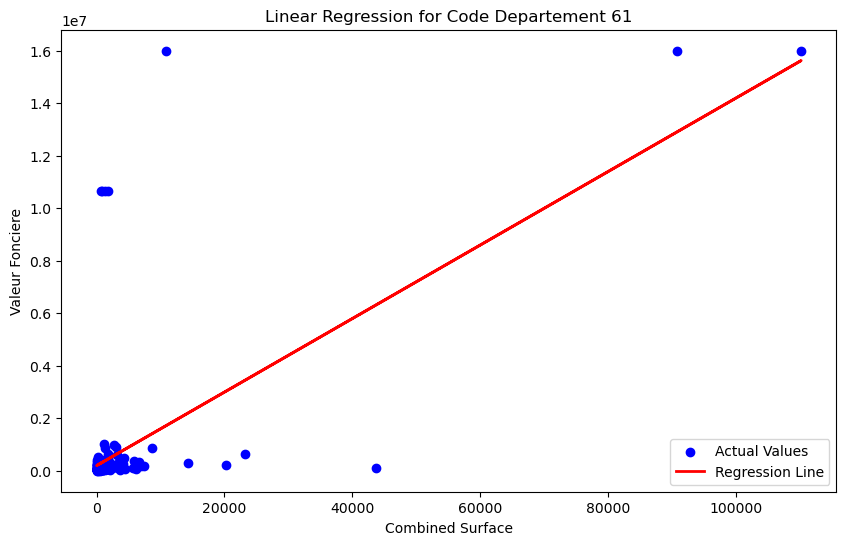

Code Departement: 62
Mean Squared Error: 834106479350.451
Model Coefficients: [41.21925241]


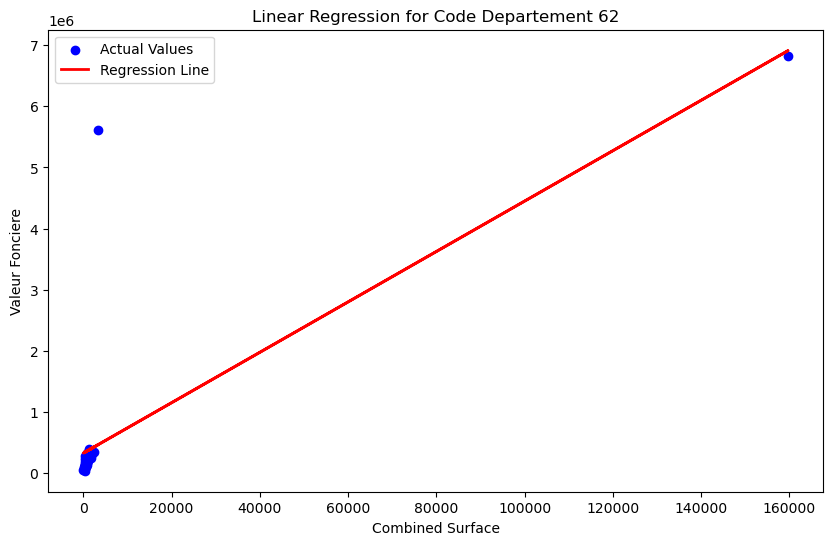

Code Departement: 63
Mean Squared Error: 14038190856.642519
Model Coefficients: [287.47279285]


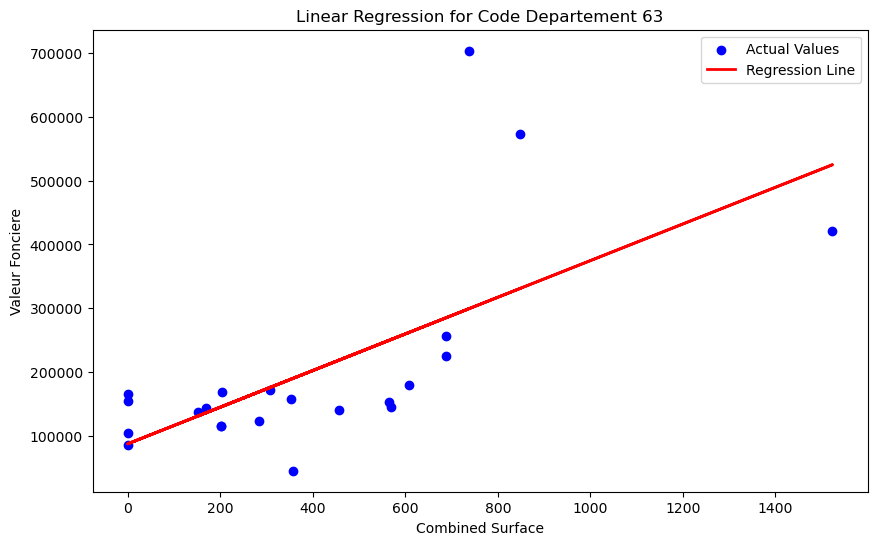

Code Departement: 64
Mean Squared Error: 5287847678.650749
Model Coefficients: [6.46383998]


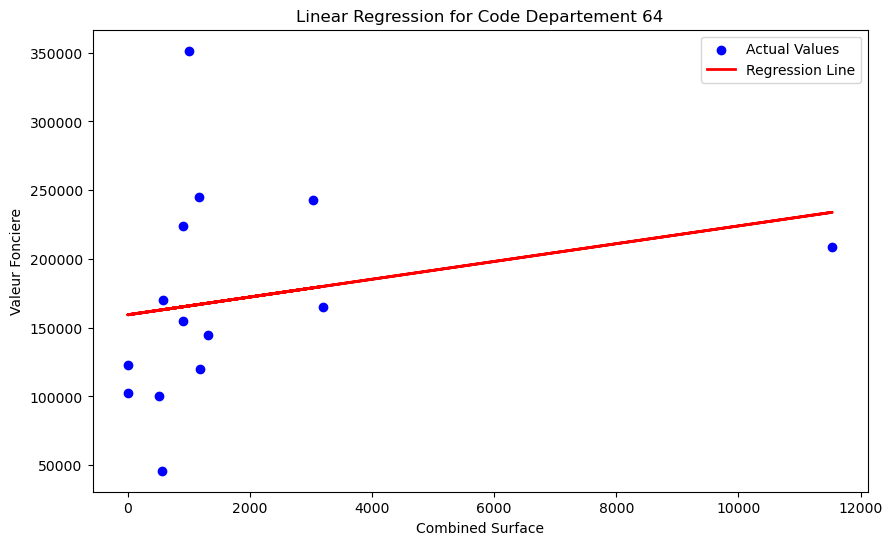

Code Departement: 65
Mean Squared Error: 1036425544.810866
Model Coefficients: [224.02677907]


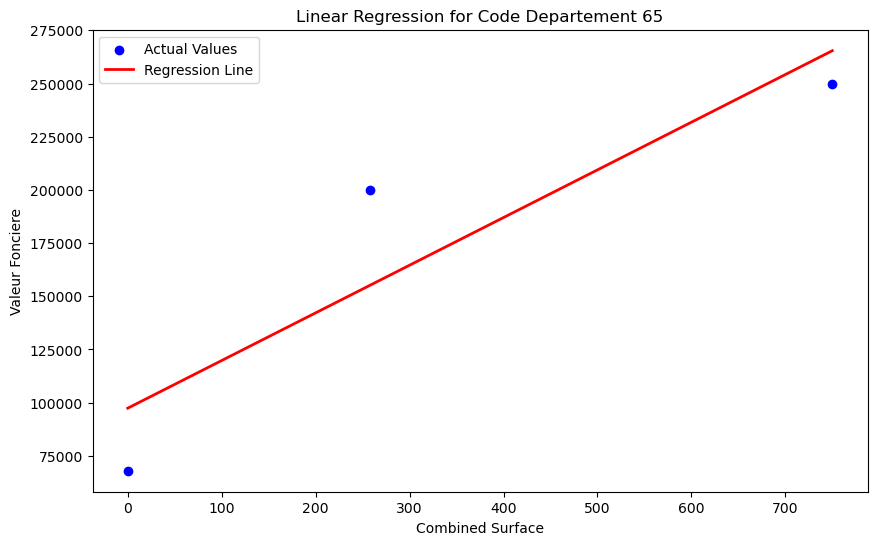

Code Departement: 66
Mean Squared Error: 2095581616.2874935
Model Coefficients: [24.45626659]


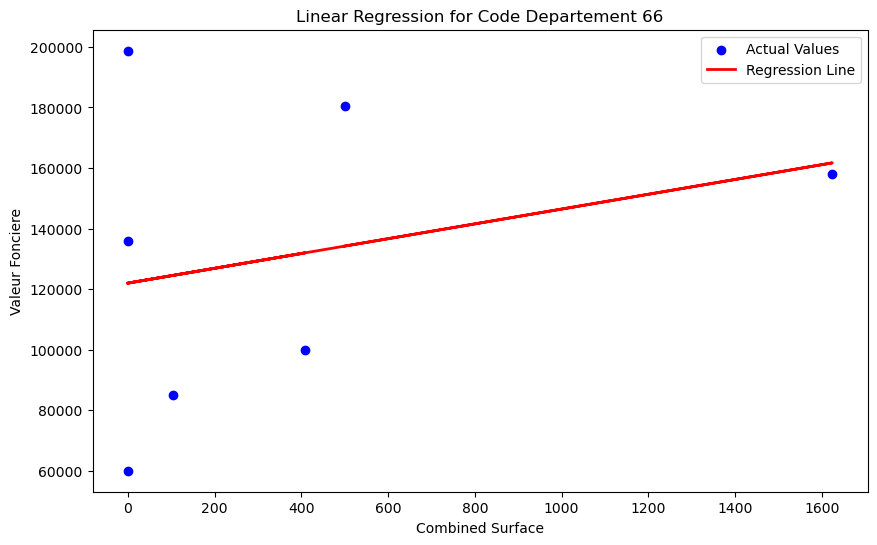

Code Departement: 69
Mean Squared Error: 342015639201.02057
Model Coefficients: [535.91915802]


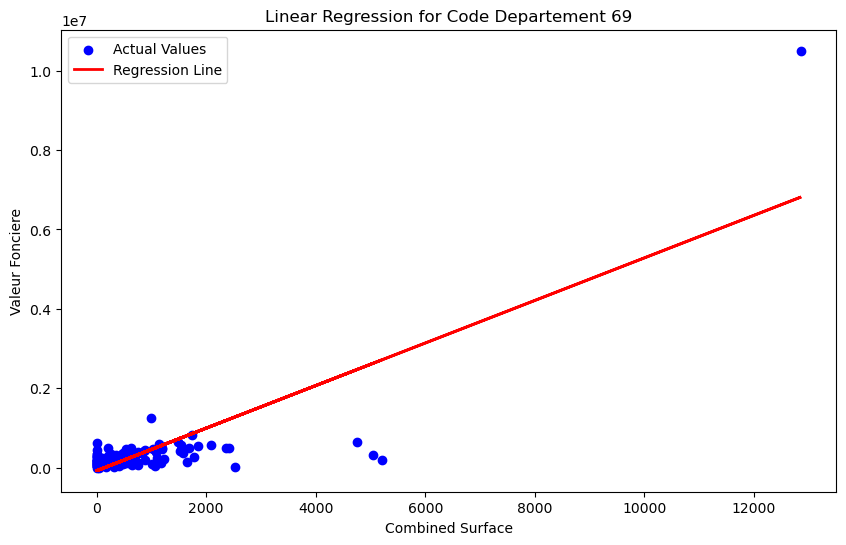

Code Departement: 70
Mean Squared Error: 9321169679.845547
Model Coefficients: [15.49876025]


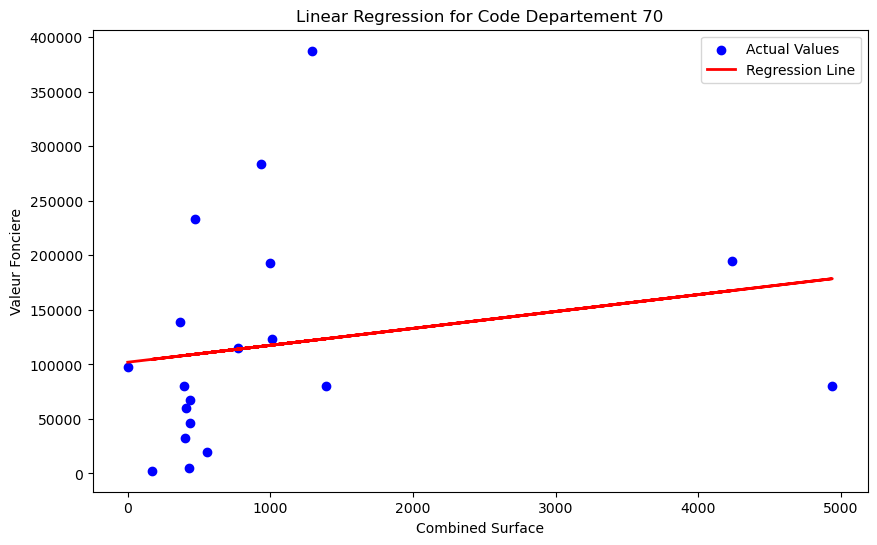

Code Departement: 71
Mean Squared Error: 8191221553.72844
Model Coefficients: [27.11674619]


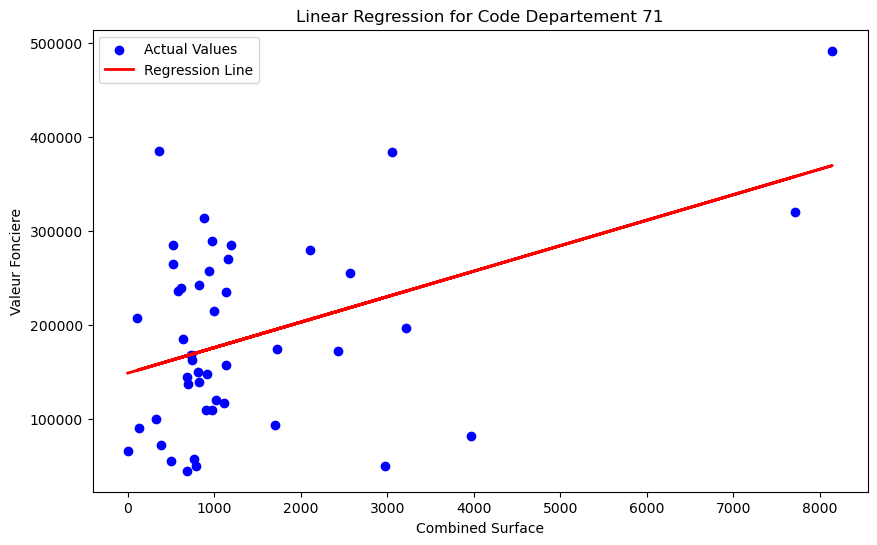

Code Departement: 72
Mean Squared Error: 10904391271.20282
Model Coefficients: [4.3459803]


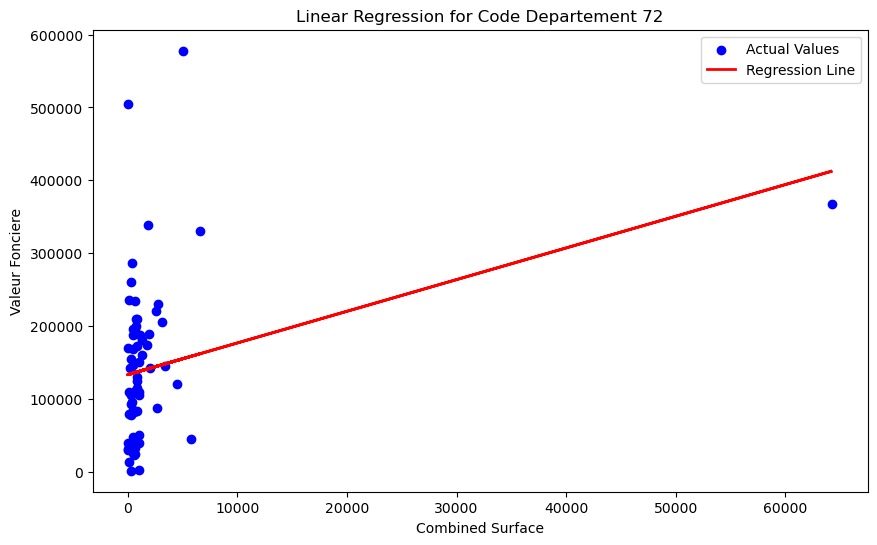

Code Departement: 73
Mean Squared Error: 252670429554.21008
Model Coefficients: [118.08763577]


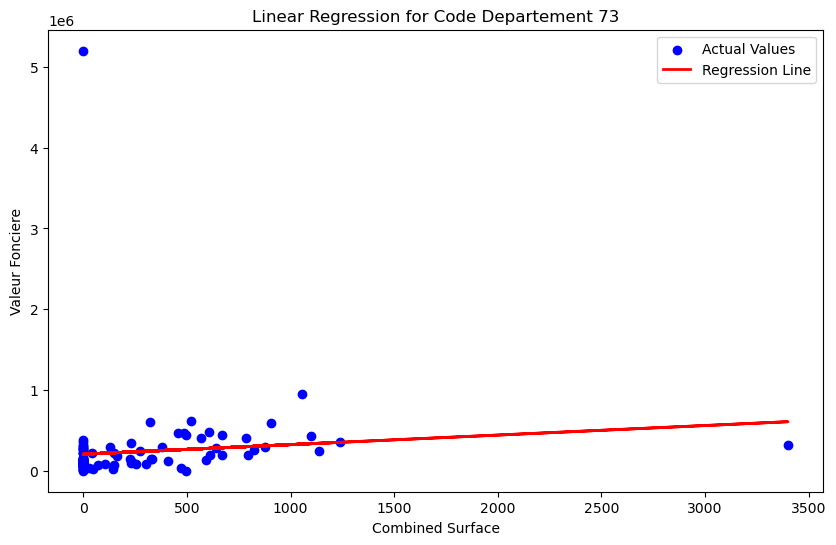

Code Departement: 74
Mean Squared Error: 87931313178.6941
Model Coefficients: [346.83381949]


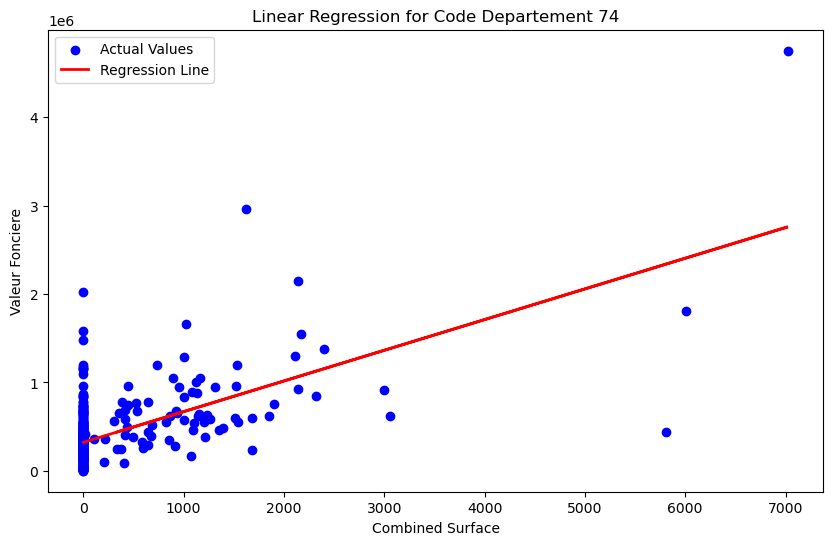

Code Departement: 76
Mean Squared Error: 10607078394.930689
Model Coefficients: [42.43250997]


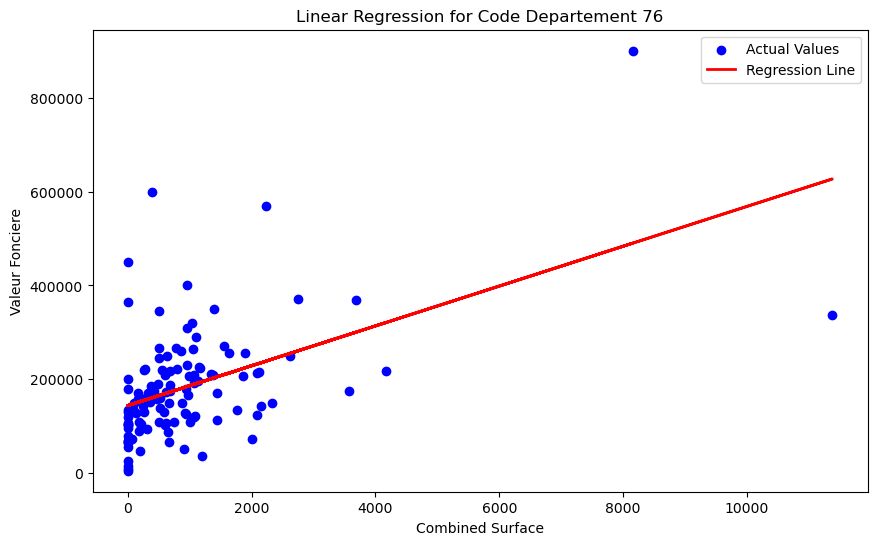

Code Departement: 77
Mean Squared Error: 13902067509.00991
Model Coefficients: [92.70020535]


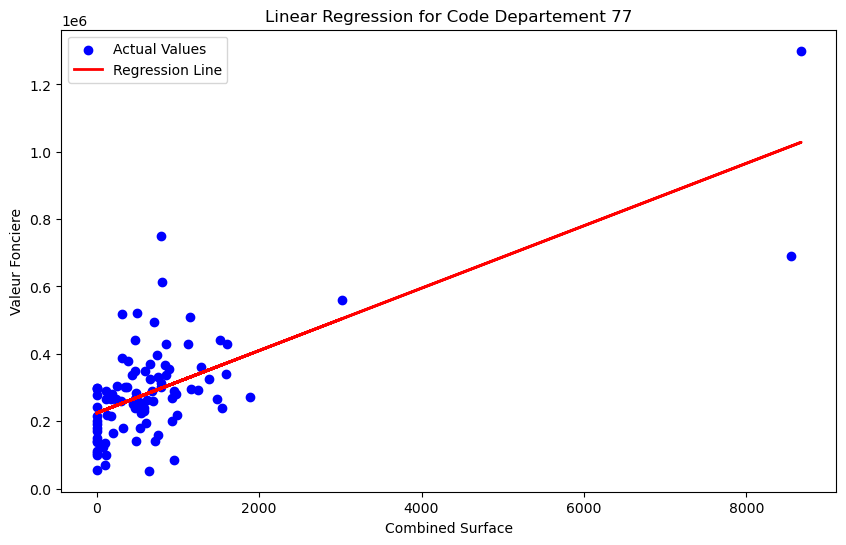

Code Departement: 78
Mean Squared Error: 106789129759.51918
Model Coefficients: [266.0474068]


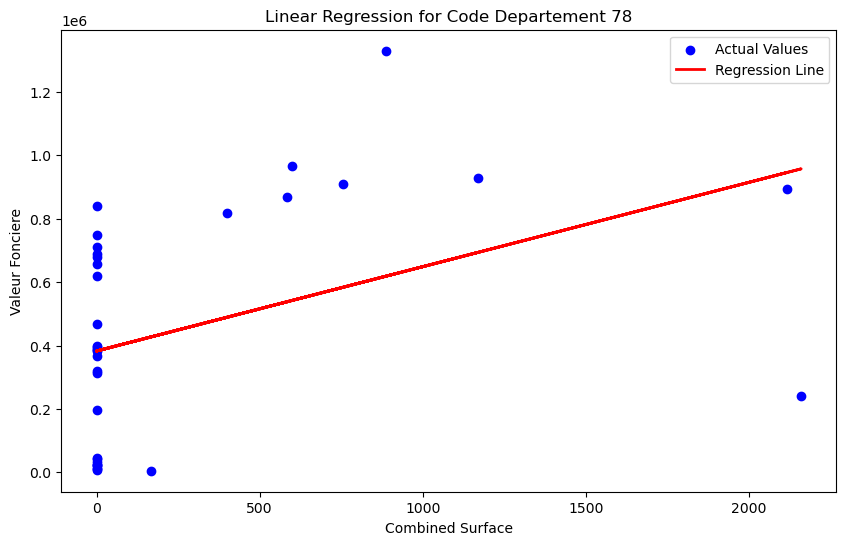

Code Departement: 79
Mean Squared Error: 5730137653.928323
Model Coefficients: [20.75885944]


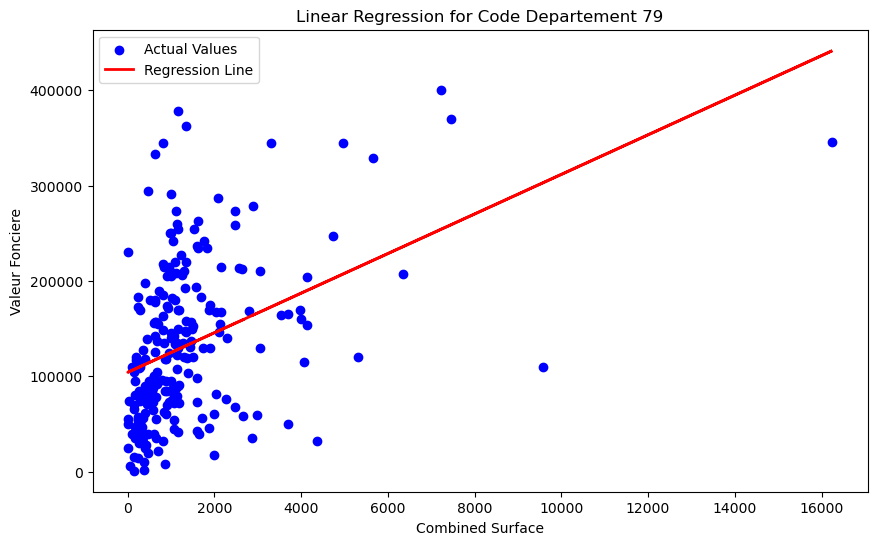

Code Departement: 80
Mean Squared Error: 637764169.775502
Model Coefficients: [2.72077462]


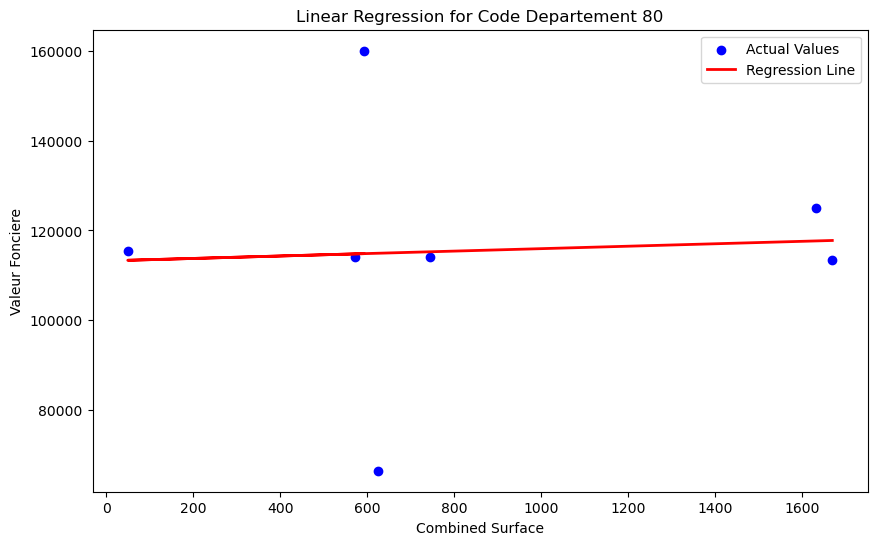

Code Departement: 81
Mean Squared Error: 26201734905.624405
Model Coefficients: [3.56585147]


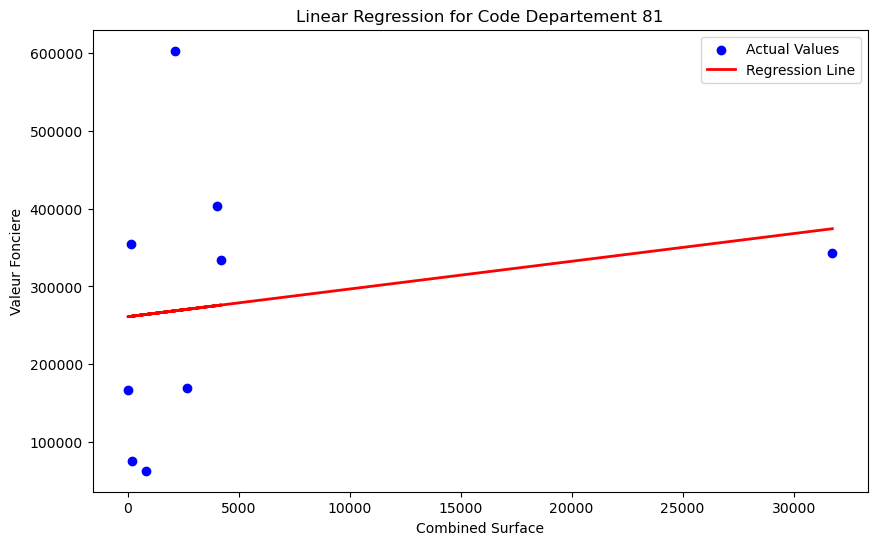

Code Departement: 85
Mean Squared Error: 43560317692.51679
Model Coefficients: [7.27578685]


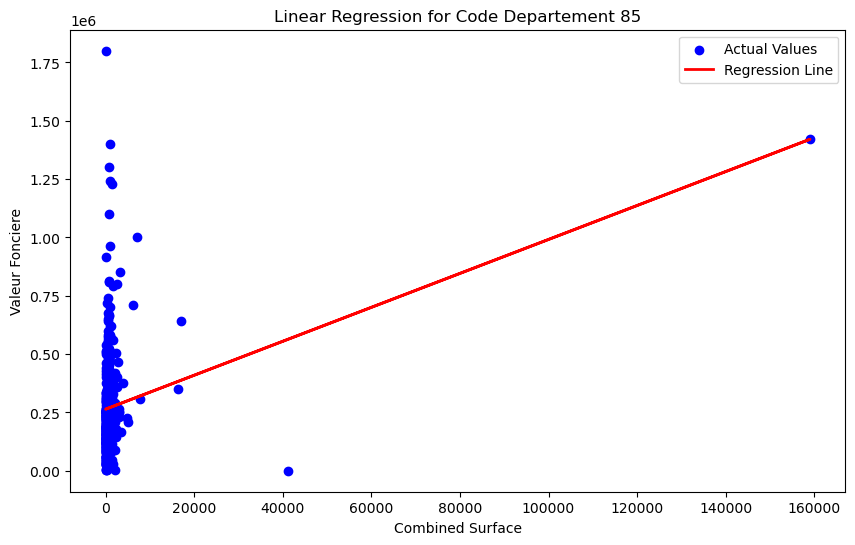

Code Departement: 86
Mean Squared Error: 6161687247.019091
Model Coefficients: [-0.195449]


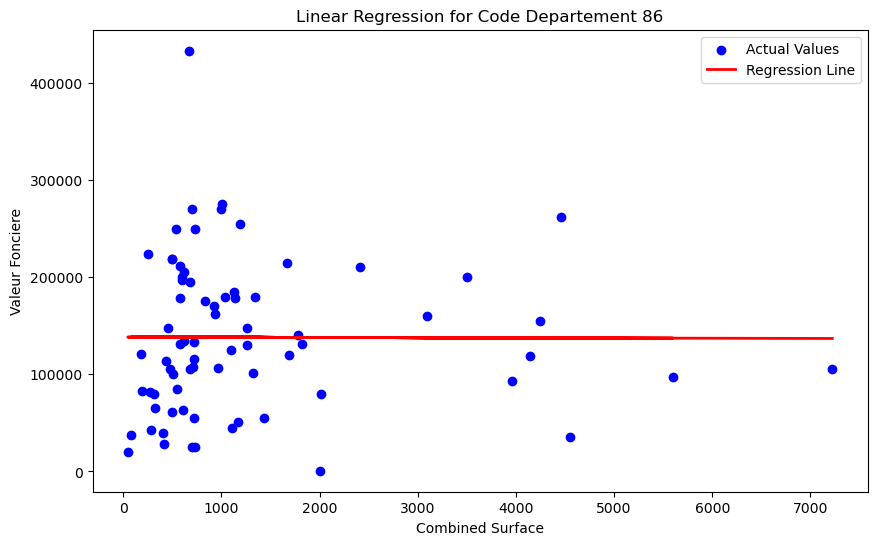

Code Departement: 87
Mean Squared Error: 7229404443.680712
Model Coefficients: [4.98224592]


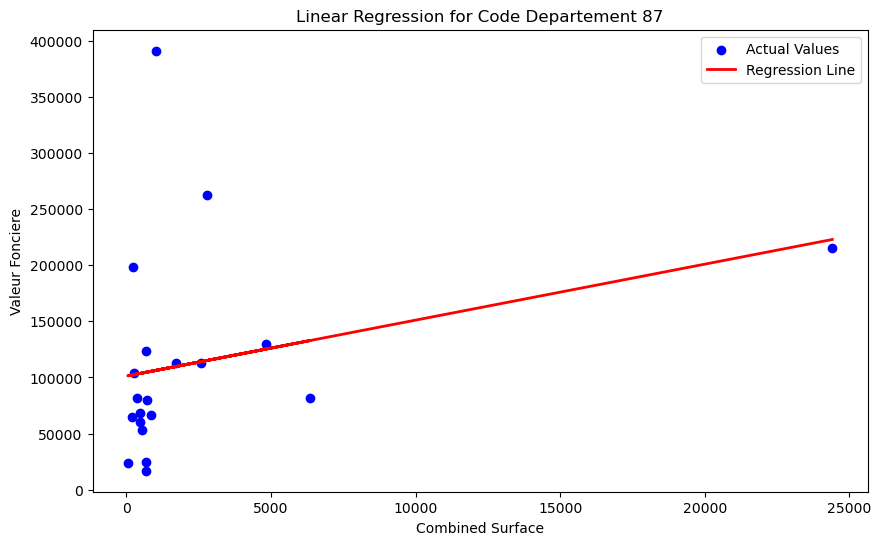

Code Departement: 88
Mean Squared Error: 23833802243.912983
Model Coefficients: [90.63308443]


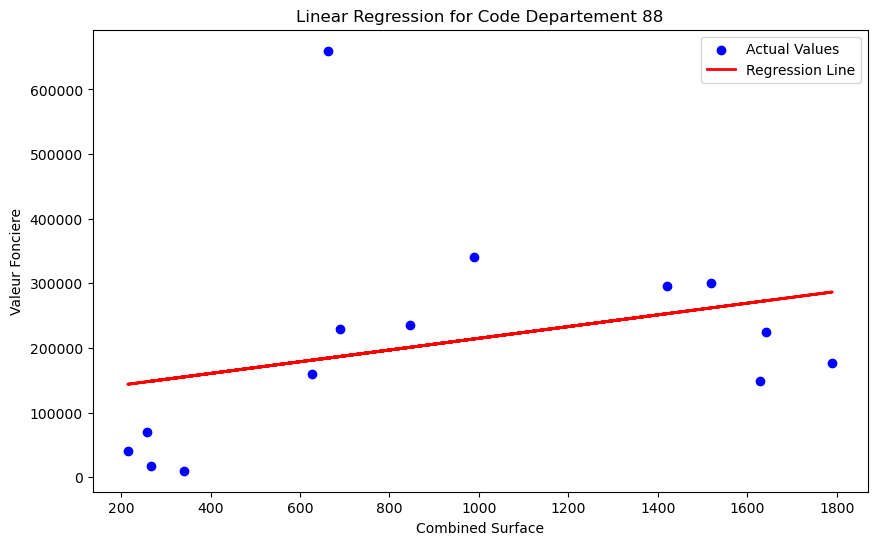

Code Departement: 89
Mean Squared Error: 5949462050.570396
Model Coefficients: [4.40641941]


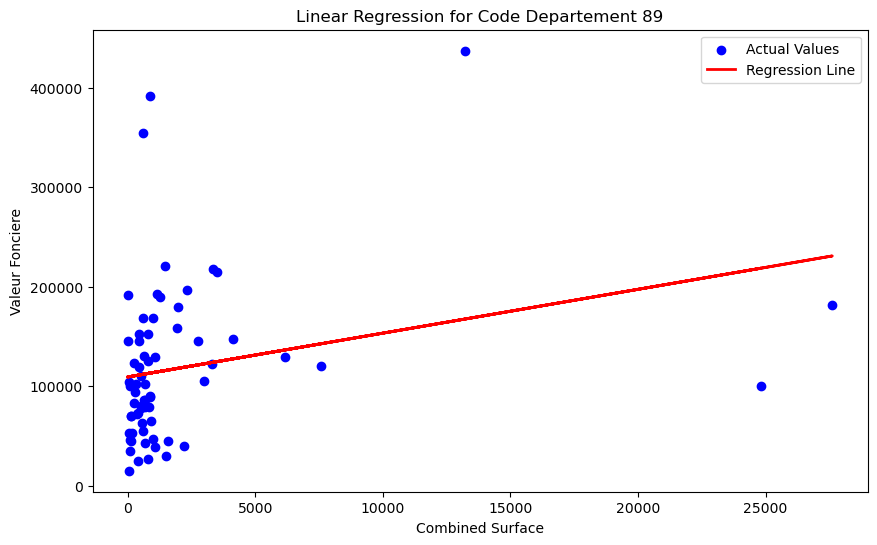

Code Departement: 90
Mean Squared Error: 9781357322.990543
Model Coefficients: [173.61447071]


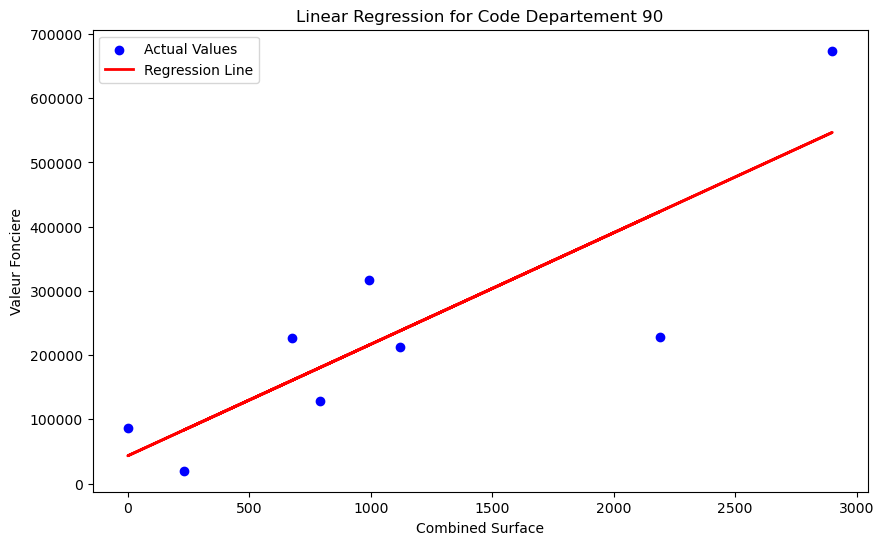

Code Departement: 91
Mean Squared Error: 18144665315.748055
Model Coefficients: [273.64898475]


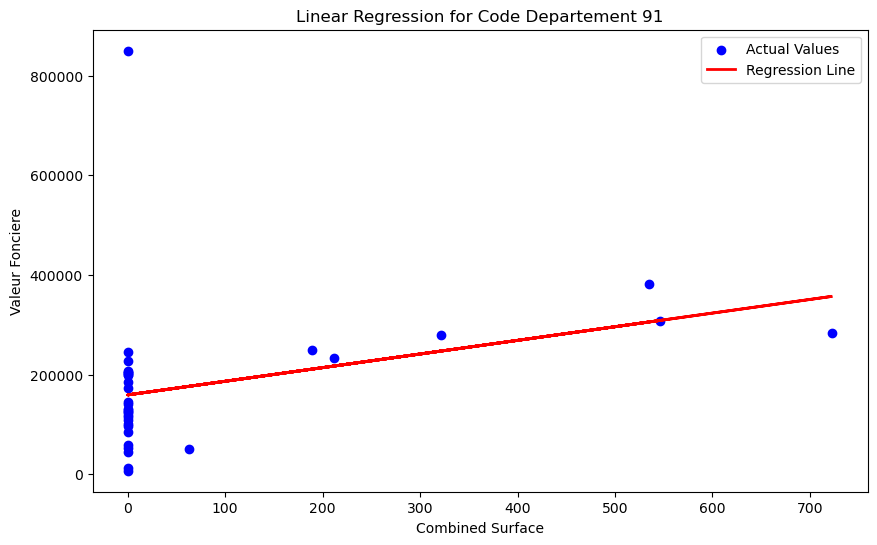

In [162]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Check unique values in 'Code departement' column
unique_code_departement = aggregated_data['Code departement'].unique()
print("Unique values in 'Code departement':", unique_code_departement)

# Loop through each unique 'Code departement' and create a plot
for specific_code_departement in unique_code_departement:
    # Filter the data for the specific Code departement
    filtered_data = aggregated_data[aggregated_data['Code departement'] == specific_code_departement]

    # Define X and y for the filtered data
    X = filtered_data[['Surface_combined']]
    y = filtered_data['Valeur fonciere']

    # Create and fit the model
    model = LinearRegression()
    model.fit(X, y)

    # Predict values
    y_pred = model.predict(X)

    # Calculate Mean Squared Error
    mse = mean_squared_error(y, y_pred)
    print(f"Code Departement: {specific_code_departement}")
    print("Mean Squared Error:", mse)
    print("Model Coefficients:", model.coef_)

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Actual Values')
    plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
    plt.xlabel('Combined Surface')
    plt.ylabel('Valeur Fonciere')
    plt.title(f'Linear Regression for Code Departement {specific_code_departement}')
    plt.legend()
    plt.show()


In [ ]:
"""
df=pd.read_csv("length_of_stay.csv")

model = LinearRegression()

X=df[["Surface_combined"]]
y=df["length_of_stay"]

model.fit(X,y)

y_pred=model.predict(X)

mse=mean_squared_error(y,y_pred)
print(mse)

print(model.coef_)
"""
